In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
import matplotlib.colors as mcolors
from matplotlib import cm
import csv
from PIL import Image 
import PIL
import os
from scipy.optimize import curve_fit
from scipy.fft import fft, ifft
import math

In [ ]:
data = pd.read_csv("GMD_data.csv")

In [3]:
data

,YYY,MM,DD,days,days_m,Bsr,dB,Kp1,Kp2,Kp3,...,ap4,ap5,ap6,ap7,ap8,Ap,SN,F10.7obs,F10.7adj,D
0,1932,1,1,0,0.5,1352,10,3.333,2.667,2.333,...,12,18,12,18,18,15,22,-1,-1,2
1,1932,1,2,1,1.5,1352,11,3.667,3.667,3.333,...,22,18,39,15,48,26,43,-1,-1,2
2,1932,1,3,2,2.5,1352,12,3.333,3.333,3.000,...,4,9,6,12,7,11,23,-1,-1,2
3,1932,1,4,3,3.5,1352,13,2.000,0.333,1.000,...,0,4,5,5,4,4,13,-1,-1,2
4,1932,1,5,4,4.5,1352,14,0.000,0.000,0.333,...,3,2,5,5,7,3,13,-1,-1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33356,2023,4,29,33356,33356.5,2587,21,3.333,3.333,3.667,...,27,22,22,15,9,19,108,156,158,0
33357,2023,4,30,33357,33357.5,2587,22,3.000,3.333,3.000,...,5,7,6,3,6,9,100,154,156,0
33358,2023,5,1,33358,33358.5,2587,23,2.667,1.333,2.333,...,5,5,7,9,18,9,102,148,150,0
33359,2023,5,2,33359,33359.5,2587,24,3.000,3.000,2.000,...,12,4,3,5,4,8,119,157,159,0


In [4]:
G1 = []
G2 = []
G3 = []
G34 = []
G4 = []
G5 = []

In [5]:
for i in range(len(data)):
    kp1_G1 = (data['Kp1'][i] >= 5) & (data['Kp1'][i]<6)
    kp2_G1 = (data['Kp2'][i] >= 5) & (data['Kp2'][i]<6)
    kp3_G1 = (data['Kp3'][i] >= 5) & (data['Kp3'][i]<6)
    kp4_G1 = (data['Kp4'][i] >= 5) & (data['Kp4'][i]<6)
    kp5_G1 = (data['Kp5'][i] >= 5) & (data['Kp5'][i]<6)
    kp6_G1 = (data['Kp6'][i] >= 5) & (data['Kp6'][i]<6)
    kp7_G1 = (data['Kp7'][i] >= 5) & (data['Kp7'][i]<6)
    kp8_G1 = (data['Kp8'][i] >= 5) & (data['Kp8'][i]<6)
    
    kp1_G2 = (data['Kp1'][i] >= 6) & (data['Kp1'][i]<7)
    kp2_G2 = (data['Kp2'][i] >= 6) & (data['Kp2'][i]<7)
    kp3_G2 = (data['Kp3'][i] >= 6) & (data['Kp3'][i]<7)
    kp4_G2 = (data['Kp4'][i] >= 6) & (data['Kp4'][i]<7)
    kp5_G2 = (data['Kp5'][i] >= 6) & (data['Kp5'][i]<7)
    kp6_G2 = (data['Kp6'][i] >= 6) & (data['Kp6'][i]<7)
    kp7_G2 = (data['Kp7'][i] >= 6) & (data['Kp7'][i]<7)
    kp8_G2 = (data['Kp8'][i] >= 6) & (data['Kp8'][i]<7)
    
    kp1_G3 = (data['Kp1'][i] >= 7) & (data['Kp1'][i]<8)
    kp2_G3 = (data['Kp2'][i] >= 7) & (data['Kp2'][i]<8)
    kp3_G3 = (data['Kp3'][i] >= 7) & (data['Kp3'][i]<8)
    kp4_G3 = (data['Kp4'][i] >= 7) & (data['Kp4'][i]<8)
    kp5_G3 = (data['Kp5'][i] >= 7) & (data['Kp5'][i]<8)
    kp6_G3 = (data['Kp6'][i] >= 7) & (data['Kp6'][i]<8)
    kp7_G3 = (data['Kp7'][i] >= 7) & (data['Kp7'][i]<8)
    kp8_G3 = (data['Kp8'][i] >= 7) & (data['Kp8'][i]<8)
    
    kp1_G34 = (data['Kp1'][i] >= 7.5) & (data['Kp1'][i]<8)
    kp2_G34 = (data['Kp2'][i] >= 7.5) & (data['Kp2'][i]<8)
    kp3_G34 = (data['Kp3'][i] >= 7.5) & (data['Kp3'][i]<8)
    kp4_G34 = (data['Kp4'][i] >= 7.5) & (data['Kp4'][i]<8)
    kp5_G34 = (data['Kp5'][i] >= 7.5) & (data['Kp5'][i]<8)
    kp6_G34 = (data['Kp6'][i] >= 7.5) & (data['Kp6'][i]<8)
    kp7_G34 = (data['Kp7'][i] >= 7.5) & (data['Kp7'][i]<8)
    kp8_G34 = (data['Kp8'][i] >= 7.5) & (data['Kp8'][i]<8)
    
    kp1_G4 = (data['Kp1'][i] >= 8) & (data['Kp1'][i]<=9)
    kp2_G4 = (data['Kp2'][i] >= 8) & (data['Kp2'][i]<=9)
    kp3_G4 = (data['Kp3'][i] >= 8) & (data['Kp3'][i]<=9)
    kp4_G4 = (data['Kp4'][i] >= 8) & (data['Kp4'][i]<=9)
    kp5_G4 = (data['Kp5'][i] >= 8) & (data['Kp5'][i]<=9)
    kp6_G4 = (data['Kp6'][i] >= 8) & (data['Kp6'][i]<=9)
    kp7_G4 = (data['Kp7'][i] >= 8) & (data['Kp7'][i]<=9)
    kp8_G4 = (data['Kp8'][i] >= 8) & (data['Kp8'][i]<=9)
    
    kp1_G5 = (data['Kp1'][i] > 9)
    kp2_G5 = (data['Kp2'][i] > 9)
    kp3_G5 = (data['Kp3'][i] > 9)
    kp4_G5 = (data['Kp4'][i] > 9)
    kp5_G5 = (data['Kp5'][i] > 9)
    kp6_G5 = (data['Kp6'][i] > 9)
    kp7_G5 = (data['Kp7'][i] > 9)
    kp8_G5 = (data['Kp8'][i] > 9)
    
    if(kp1_G5 | kp2_G5 | kp3_G5 | kp4_G5 | kp5_G5 | kp6_G5 | kp7_G5 | kp8_G5):
        G5.append([data['YYY'][i],data['MM'][i],data['DD'][i],data['Kp1'][i],data['Kp2'][i],data['Kp3'][i],data['Kp4'][i], \
                  data['Kp5'][i],data['Kp6'][i],data['Kp7'][i],data['Kp8'][i]])
    elif(kp1_G4 | kp2_G4 | kp3_G4 | kp4_G4 | kp5_G4 | kp6_G4 | kp7_G4 | kp8_G4):
        G4.append([data['YYY'][i],data['MM'][i],data['DD'][i],data['Kp1'][i],data['Kp2'][i],data['Kp3'][i],data['Kp4'][i], \
                  data['Kp5'][i],data['Kp6'][i],data['Kp7'][i],data['Kp8'][i]])
    elif kp1_G34 | kp2_G34 | kp3_G34 | kp4_G34 | kp5_G34 | kp6_G34 | kp7_G34 | kp8_G34:
        G34.append([data['YYY'][i],data['MM'][i],data['DD'][i],data['Kp1'][i],data['Kp2'][i],data['Kp3'][i],data['Kp4'][i], \
                  data['Kp5'][i],data['Kp6'][i],data['Kp7'][i],data['Kp8'][i]])
    elif(kp1_G3 | kp2_G3 | kp3_G3 | kp4_G3 | kp5_G3 | kp6_G3 | kp7_G3 | kp8_G3):
        G3.append([data['YYY'][i],data['MM'][i],data['DD'][i],data['Kp1'][i],data['Kp2'][i],data['Kp3'][i],data['Kp4'][i], \
                  data['Kp5'][i],data['Kp6'][i],data['Kp7'][i],data['Kp8'][i]])
    elif(kp1_G2 | kp2_G2 | kp3_G2 | kp4_G2 | kp5_G2 | kp6_G2 | kp7_G2 | kp8_G2):
        G2.append([data['YYY'][i],data['MM'][i],data['DD'][i],data['Kp1'][i],data['Kp2'][i],data['Kp3'][i],data['Kp4'][i], \
                  data['Kp5'][i],data['Kp6'][i],data['Kp7'][i],data['Kp8'][i]])
    elif(kp1_G1 | kp2_G1 | kp3_G1 | kp4_G1 | kp5_G1 | kp6_G1 | kp7_G1 | kp8_G1):
        G1.append([data['YYY'][i],data['MM'][i],data['DD'][i],data['Kp1'][i],data['Kp2'][i],data['Kp3'][i],data['Kp4'][i], \
                  data['Kp5'][i],data['Kp6'][i],data['Kp7'][i],data['Kp8'][i]])

In [6]:
number_G1 = len(G1)
number_G2 = len(G2)
number_G3 = len(G3)
number_G34 = len(G34)
number_G4 = len(G4)
number_G5 = len(G5)

In [7]:
print(number_G1)
print(number_G2)
print(number_G3+number_G34)
print(number_G4)
print(number_G5)

3332
1345
502
238
0


In [8]:
#Currently broken need to fix and include month & day, not just day
Reduce_G1 = []
count_G1 = 0
for i in range(len(G1)-1):
    year_diff = abs(G1[i+1][0]-G1[i][0])
    month_diff = abs(G1[i+1][1]-G1[i][1])
    day_diff = abs(G1[i+1][2]-G1[i][2])
    if((day_diff>5) | (month_diff > 0)):
        count_G1 += 1
        Reduce_G1.append(G1[i])

In [9]:
Reduce_G2 = []
count_G2 = 0
for i in range(len(G2)-1):
    year_diff = abs(G2[i+1][0]-G2[i][0])
    month_diff = abs(G2[i+1][1]-G2[i][1])
    day_diff = abs(G2[i+1][2]-G2[i][2])
    if((day_diff>5) | (month_diff > 0) | (year_diff > 0)):
        count_G2 += 1
        Reduce_G2.append(G2[i])

In [10]:
Reduce_G3 = []
count_G3 = 0
for i in range(len(G3)-1):
    year_diff = abs(G3[i+1][0]-G3[i][0])
    month_diff = abs(G3[i+1][1]-G3[i][1])
    day_diff = abs(G3[i+1][2]-G3[i][2])
    if((day_diff>5) | (month_diff > 0) | (year_diff > 0)):
        count_G3 += 1
        Reduce_G3.append(G3[i])

In [11]:
Reduce_G34 = []
count_G34 = 0
for i in range(len(G34)-1):
    year_diff = abs(G34[i+1][0]-G34[i][0])
    month_diff = abs(G34[i+1][1]-G34[i][1])
    day_diff = abs(G34[i+1][2]-G34[i][2])
    if((day_diff>5) | (month_diff > 0) | (year_diff > 0)):
        count_G34 += 1
        Reduce_G34.append(G34[i])

In [12]:
Reduce_G4 = []
count_G4 = 0
for i in range(len(G4)-1):
    year_diff = abs(G4[i+1][0]-G4[i][0])
    month_diff = abs(G4[i+1][1]-G4[i][1])
    day_diff = abs(G4[i+1][2]-G4[i][2])
    if((day_diff>5) | (month_diff > 0) | (year_diff > 0)):
        count_G4 += 1
        Reduce_G4.append(G4[i])

In [13]:
G4_G34 = G34 + G4

In [14]:
G4_G34.sort()

In [15]:
Reduce_G4_G34 = []
count_G4_G34 = 0
for i in range(len(G4_G34)-1):
    year_diff = abs(G4_G34[i+1][0]-G4_G34[i][0])
    month_diff = abs(G4_G34[i+1][1]-G4_G34[i][1])
    day_diff = abs(G4_G34[i+1][2]-G4_G34[i][2])
    if((day_diff>5) | (month_diff > 0) | (year_diff > 0)):
        count_G4_G34 += 1
        Reduce_G4_G34.append(G4_G34[i])

In [16]:
print(len(G4_G34))
count_G4_G34

363


258

In [17]:
different_yearsG4 = 1
temp = Reduce_G4[0][0]
G4_years = []
G4_years.append(temp)
for i in range(len(Reduce_G4)):
    if(Reduce_G4[i][0]>temp):
        temp = Reduce_G4[i][0]
        G4_years.append(Reduce_G4[i][0])
        different_yearsG4 += 1

In [18]:
different_yearsG34 = 1
temp = Reduce_G34[0][0]
G34_years = []
G34_years.append(temp)
for i in range(len(Reduce_G34)):
    if(Reduce_G34[i][0]>temp):
        temp = Reduce_G34[i][0]
        G34_years.append(Reduce_G34[i][0])
        different_yearsG34 += 1

In [19]:
different_yearsG4_G34 = 1
temp = Reduce_G4_G34[0][0]
G4_G34_years = []
G4_G34_years.append(temp)
for i in range(len(Reduce_G4_G34)):
    if(Reduce_G4_G34[i][0]>temp):
        temp = Reduce_G4_G34[i][0]
        G4_G34_years.append(Reduce_G4_G34[i][0])
        different_yearsG4_G34 += 1

In [20]:
count_G4_G34_peryear = []
for i in range(len(G4_G34_years)):
    count1 = 0
    for j in range(len(Reduce_G4_G34)):
        if((Reduce_G4_G34[j][0] == G4_G34_years[i])):
            count1 += 1
    count_G4_G34_peryear.append([G4_G34_years[i], count1])

In [21]:
count_G34_peryear = []
for i in range(len(G34_years)):
    count1 = 0
    for j in range(len(Reduce_G34)):
        if((Reduce_G34[j][0] == G34_years[i])):
            count1 += 1
    count_G34_peryear.append([G34_years[i], count1])

In [22]:
count_G4_peryear = []
for i in range(len(G4_years)):
    count1 = 0
    for j in range(len(Reduce_G4)):
        if((Reduce_G4[j][0] == G4_years[i])):
            count1 += 1
    count_G4_peryear.append([G4_years[i], count1])

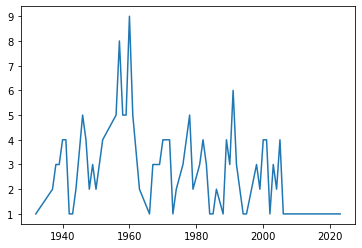

In [23]:
years = []
G4_count = []
for i in range(len(count_G4_peryear)):
    years.append(count_G4_peryear[i][0])
    G4_count.append(count_G4_peryear[i][1])
    #plt.scatter(count_G4_peryear[i][0],count_G4_peryear[i][1], c = 'blue')
plt.plot(years,G4_count)

In [24]:
G4

[[1932, 5, 30, 7.0, 8.0, 6.332999999999999, 3.0, 2.667, 3.667, 4.333, 3.0],
 [1937,
  4,
  24,
  1.6669999999999998,
  2.333,
  2.0,
  2.667,
  4.0,
  4.667,
  5.332999999999999,
  8.0],
 [1937,
  4,
  26,
  5.667000000000001,
  4.667,
  3.333,
  2.333,
  2.0,
  5.0,
  6.667000000000001,
  8.333],
 [1937,
  4,
  28,
  7.0,
  8.0,
  8.0,
  7.332999999999999,
  6.667000000000001,
  6.667000000000001,
  5.0,
  5.332999999999999],
 [1937,
  8,
  22,
  1.3330000000000002,
  6.0,
  8.0,
  7.667000000000001,
  5.667000000000001,
  3.0,
  4.333,
  2.333],
 [1938,
  1,
  17,
  6.667000000000001,
  6.332999999999999,
  6.667000000000001,
  6.332999999999999,
  8.333,
  7.667000000000001,
  4.667,
  6.332999999999999],
 [1938,
  1,
  22,
  5.667000000000001,
  7.332999999999999,
  8.333,
  8.333,
  6.667000000000001,
  7.0,
  5.332999999999999,
  4.333],
 [1938,
  1,
  25,
  4.0,
  2.667,
  1.6669999999999998,
  4.667,
  6.0,
  7.332999999999999,
  8.667,
  8.333],
 [1938, 1, 26, 8.333, 6.3329999

In [25]:
Reduce_G4

[[1932, 5, 30, 7.0, 8.0, 6.332999999999999, 3.0, 2.667, 3.667, 4.333, 3.0],
 [1937,
  4,
  28,
  7.0,
  8.0,
  8.0,
  7.332999999999999,
  6.667000000000001,
  6.667000000000001,
  5.0,
  5.332999999999999],
 [1937,
  8,
  22,
  1.3330000000000002,
  6.0,
  8.0,
  7.667000000000001,
  5.667000000000001,
  3.0,
  4.333,
  2.333],
 [1938, 1, 26, 8.333, 6.332999999999999, 4.333, 4.667, 4.0, 4.333, 4.0, 2.0],
 [1938,
  4,
  16,
  3.333,
  7.0,
  9.0,
  8.0,
  7.667000000000001,
  5.667000000000001,
  4.333,
  5.332999999999999],
 [1938, 5, 11, 2.667, 2.667, 2.0, 2.333, 2.0, 7.667000000000001, 8.667, 8.667],
 [1939,
  4,
  17,
  5.667000000000001,
  7.332999999999999,
  8.0,
  6.667000000000001,
  7.667000000000001,
  7.332999999999999,
  6.667000000000001,
  6.332999999999999],
 [1939,
  4,
  24,
  3.333,
  2.333,
  2.0,
  2.333,
  1.3330000000000002,
  7.0,
  8.667,
  7.332999999999999],
 [1939,
  10,
  15,
  6.667000000000001,
  8.0,
  6.667000000000001,
  3.333,
  3.333,
  4.667,
  4.0,

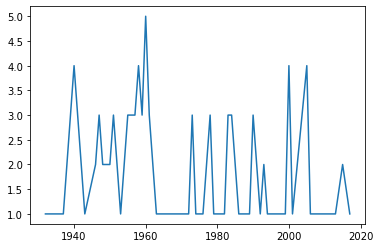

In [26]:
years = []
G34_count = []
for i in range(len(count_G34_peryear)):
    years.append(count_G34_peryear[i][0])
    G34_count.append(count_G34_peryear[i][1])
    #plt.scatter(count_G34_peryear[i][0],count_G34_peryear[i][1], c = 'blue')
plt.plot(years,G34_count)

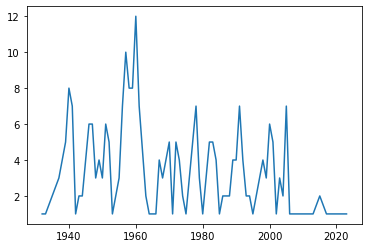

In [27]:
years = []
G4_G34_count = []
for i in range(len(count_G4_G34_peryear)):
    years.append(count_G4_G34_peryear[i][0])
    G4_G34_count.append(count_G4_G34_peryear[i][1])
    #plt.scatter(count_G4_G34_peryear[i][0],count_G4_G34_peryear[i][1], c = 'blue')
plt.plot(years,G4_G34_count)

Text(0.5, 0, 'G3_Storm')

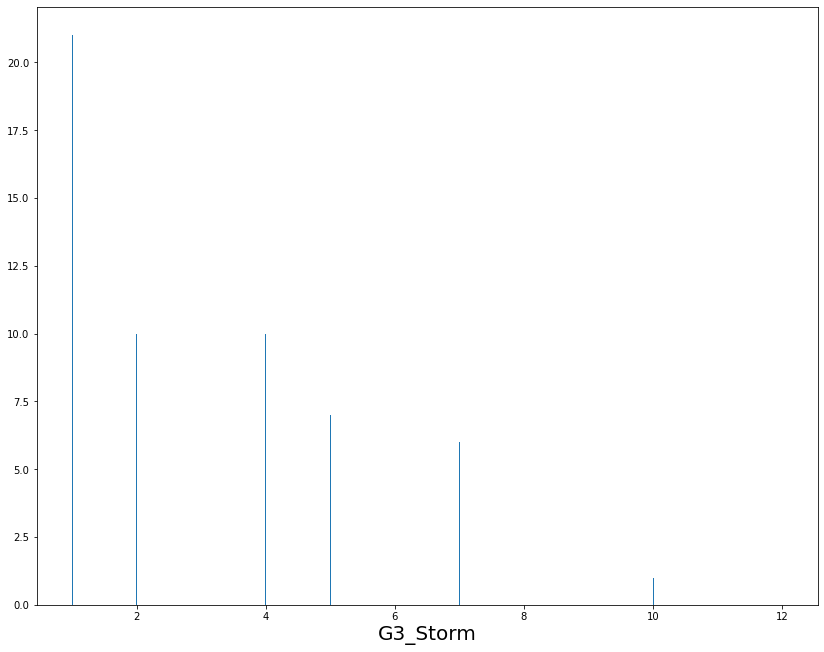

In [28]:
plt.figure(figsize = (14,11),facecolor=(1, 1, 1))
bin1 = 1000
s, bins, patches = plt.hist(G4_G34_count, bins=bin1, alpha = 1)
plt.xlabel('G3_Storm', fontsize = 20)

Text(0.5, 0, 'Temperature')

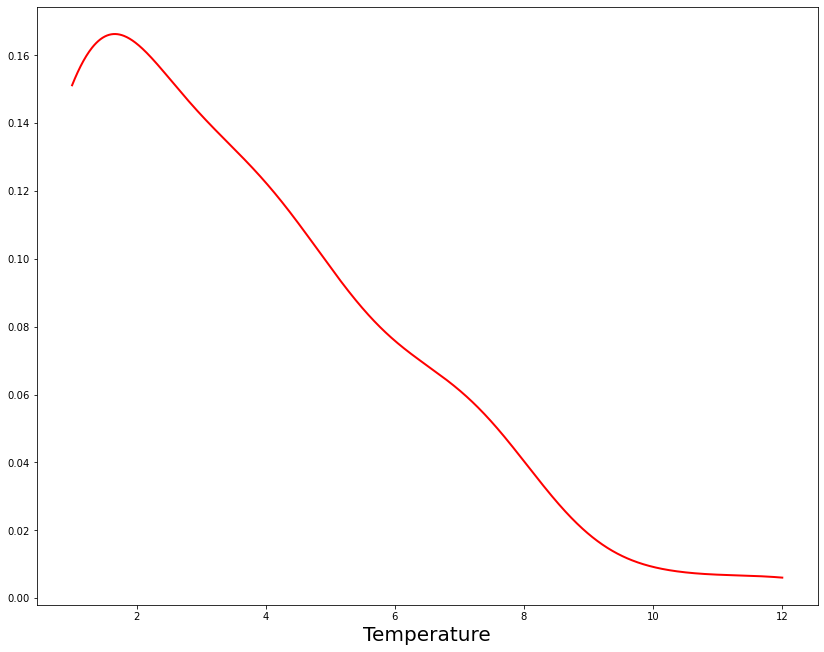

In [33]:
import math
from scipy.stats import gaussian_kde
plt.figure(figsize = (14,11),facecolor=(1, 1, 1))

kde = gaussian_kde(G4_G34_count)
x = np.linspace(min(G4_G34_count),max(G4_G34_count), num=1000)

pdf = kde(x)

plt.plot(x,pdf,color='red',linewidth=2)
plt.xlabel('Temperature', fontsize = 20)

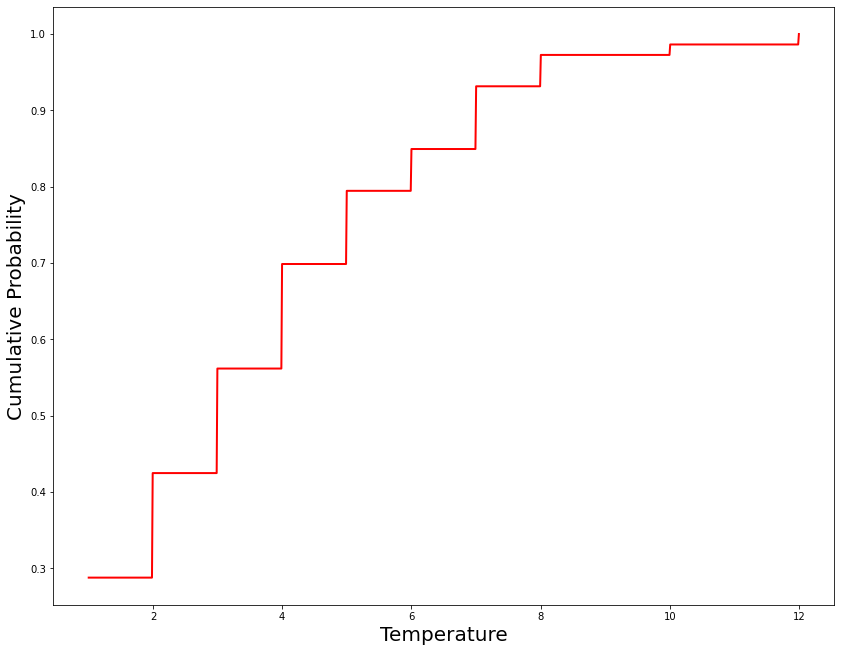

In [34]:
# Create histogram and calculate PDF
plt.figure(figsize = (14,11),facecolor=(1, 1, 1))
num_bins = 1000
bin_widths = np.diff(bins)
bin_centers = bins[:-1] + bin_widths / 2
pdf_T24 = s / (sum(s) * bin_widths)

# Calculate CDF from PDF
cdf_T24 = np.cumsum(pdf_T24 * bin_widths)

# Plot the CDF
plt.plot(bin_centers, cdf_T24, color='red', linewidth=2)

# Add labels and title
plt.xlabel('Temperature',fontsize = 20)
plt.ylabel('Cumulative Probability',fontsize = 20)

# Show the plot
plt.show()

In [35]:
All_Gs = G5 + G4 + G34 + G3 + G2 + G1

In [36]:
All_Gs

[[1932, 5, 30, 7.0, 8.0, 6.332999999999999, 3.0, 2.667, 3.667, 4.333, 3.0],
 [1937,
  4,
  24,
  1.6669999999999998,
  2.333,
  2.0,
  2.667,
  4.0,
  4.667,
  5.332999999999999,
  8.0],
 [1937,
  4,
  26,
  5.667000000000001,
  4.667,
  3.333,
  2.333,
  2.0,
  5.0,
  6.667000000000001,
  8.333],
 [1937,
  4,
  28,
  7.0,
  8.0,
  8.0,
  7.332999999999999,
  6.667000000000001,
  6.667000000000001,
  5.0,
  5.332999999999999],
 [1937,
  8,
  22,
  1.3330000000000002,
  6.0,
  8.0,
  7.667000000000001,
  5.667000000000001,
  3.0,
  4.333,
  2.333],
 [1938,
  1,
  17,
  6.667000000000001,
  6.332999999999999,
  6.667000000000001,
  6.332999999999999,
  8.333,
  7.667000000000001,
  4.667,
  6.332999999999999],
 [1938,
  1,
  22,
  5.667000000000001,
  7.332999999999999,
  8.333,
  8.333,
  6.667000000000001,
  7.0,
  5.332999999999999,
  4.333],
 [1938,
  1,
  25,
  4.0,
  2.667,
  1.6669999999999998,
  4.667,
  6.0,
  7.332999999999999,
  8.667,
  8.333],
 [1938, 1, 26, 8.333, 6.3329999

In [37]:
# #Reduce_All_Gs = All_Gs.copy()
removej = []
count_remove = 0
for i in range(len(All_Gs)):
    for j in range((i+1),(len(All_Gs)),1):
        year_diff = abs(All_Gs[j][0]-All_Gs[i][0])
        month_diff = abs(All_Gs[j][1]-All_Gs[i][1])
        day_diff = abs(All_Gs[j][2]-All_Gs[i][2])
        if((day_diff<=5) & (month_diff == 0) & (year_diff == 0)):
            if All_Gs[j] not in removej:
                count_remove += 1
                removej.append(All_Gs[j])
#             #Reduce_All_Gs.remove(All_Gs[j])

In [ ]:
4 in range(-5,0)

In [ ]:
endtimes = []
begintimes = []
for i in range(len(All_Gs)):
    for j in range((i+1),(len(All_Gs))):
        year_diff = All_Gs[j][0]-All_Gs[i][0]
        month_diff = All_Gs[j][1]-All_Gs[i][1]
        day_diff = All_Gs[j][2]-All_Gs[i][2]
        if((day_diff in range(0,5)) & (month_diff == 0) & (year_diff == 0)):
            if All_Gs[j] not in endtimes:
                endtimes.append(All_Gs[j])
        elif((day_diff in range(-5,0)) & (month_diff == 0) & (year_diff == 0)):
            if All_Gs[j] not in begintimes:
                begintimes.append(All_Gs[j])

In [ ]:
begintimes.sort()
endtimes.sort()

In [ ]:
All_Gs

In [ ]:
begintimes

In [ ]:
endtimes

In [ ]:
# remove = []
# for i in range(len(removej)):
#     if removej[i] not in remove:
#         remove.append(removej[i])

In [ ]:
Reduce_All_Gs = All_Gs.copy()
for i in range(len(removej)):
    Reduce_All_Gs.remove(removej[i])

In [ ]:
# Reduce_All_Gs

In [ ]:
#Reduce_All_Gs.sort()

In [ ]:
# Reduce_All_Gs

In [ ]:
# print(len(All_Gs))
# All_Gs

In [ ]:
# print(len(Reduce_All_Gs))
# Reduce_All_Gs

In [ ]:
# All_Gs[0][10]
#3 = kp1
#10 = kp8

In [ ]:
new_G1 = []
new_G2 = []
new_G3 = []
new_G4 = []
new_G5 = []
for i in range(len(Reduce_All_Gs)):
    kp1_G1 = (Reduce_All_Gs[i][3] >= 5) & (Reduce_All_Gs[i][3]<6)
    kp2_G1 = (Reduce_All_Gs[i][4] >= 5) & (Reduce_All_Gs[i][4]<6)
    kp3_G1 = (Reduce_All_Gs[i][5] >= 5) & (Reduce_All_Gs[i][5]<6)
    kp4_G1 = (Reduce_All_Gs[i][6] >= 5) & (Reduce_All_Gs[i][6]<6)
    kp5_G1 = (Reduce_All_Gs[i][7] >= 5) & (Reduce_All_Gs[i][7]<6)
    kp6_G1 = (Reduce_All_Gs[i][8] >= 5) & (Reduce_All_Gs[i][8]<6)
    kp7_G1 = (Reduce_All_Gs[i][9] >= 5) & (Reduce_All_Gs[i][9]<6)
    kp8_G1 = (Reduce_All_Gs[i][10] >= 5) & (Reduce_All_Gs[i][10]<6)
    
    kp1_G2 = (Reduce_All_Gs[i][3] >= 6) & (Reduce_All_Gs[i][3]<7)
    kp2_G2 = (Reduce_All_Gs[i][4] >= 6) & (Reduce_All_Gs[i][4]<7)
    kp3_G2 = (Reduce_All_Gs[i][5] >= 6) & (Reduce_All_Gs[i][5]<7)
    kp4_G2 = (Reduce_All_Gs[i][6] >= 6) & (Reduce_All_Gs[i][6]<7)
    kp5_G2 = (Reduce_All_Gs[i][7] >= 6) & (Reduce_All_Gs[i][7]<7)
    kp6_G2 = (Reduce_All_Gs[i][8] >= 6) & (Reduce_All_Gs[i][8]<7)
    kp7_G2 = (Reduce_All_Gs[i][9] >= 6) & (Reduce_All_Gs[i][9]<7)
    kp8_G2 = (Reduce_All_Gs[i][10] >= 6) & (Reduce_All_Gs[i][10]<7)
    
    kp1_G3 = (Reduce_All_Gs[i][3] >= 7) & (Reduce_All_Gs[i][3]<8)
    kp2_G3 = (Reduce_All_Gs[i][4] >= 7) & (Reduce_All_Gs[i][4]<8)
    kp3_G3 = (Reduce_All_Gs[i][5] >= 7) & (Reduce_All_Gs[i][5]<8)
    kp4_G3 = (Reduce_All_Gs[i][6] >= 7) & (Reduce_All_Gs[i][6]<8)
    kp5_G3 = (Reduce_All_Gs[i][7] >= 7) & (Reduce_All_Gs[i][7]<8)
    kp6_G3 = (Reduce_All_Gs[i][8] >= 7) & (Reduce_All_Gs[i][8]<8)
    kp7_G3 = (Reduce_All_Gs[i][9] >= 7) & (Reduce_All_Gs[i][9]<8)
    kp8_G3 = (Reduce_All_Gs[i][10] >= 7) & (Reduce_All_Gs[i][10]<8)
    
#     kp1_G34 = (Reduce_All_Gs[i][3] >= 7.5) & (Reduce_All_Gs[i][3]<8)
#     kp2_G34 = (Reduce_All_Gs[i][4] >= 7.5) & (Reduce_All_Gs[i][4]<8)
#     kp3_G34 = (Reduce_All_Gs[i][5] >= 7.5) & (Reduce_All_Gs[i][5]<8)
#     kp4_G34 = (Reduce_All_Gs[i][6] >= 7.5) & (Reduce_All_Gs[i][6]<8)
#     kp5_G34 = (Reduce_All_Gs[i][7] >= 7.5) & (Reduce_All_Gs[i][7]<8)
#     kp6_G34 = (Reduce_All_Gs[i][8] >= 7.5) & (Reduce_All_Gs[i][8]<8)
#     kp7_G34 = (Reduce_All_Gs[i][9] >= 7.5) & (Reduce_All_Gs[i][9]<8)
#     kp8_G34 = (Reduce_All_Gs[i][10] >= 7.5) & (Reduce_All_Gs[i][10]<8)
    
    kp1_G4 = (Reduce_All_Gs[i][3] >= 8) & (Reduce_All_Gs[i][3]<=9)
    kp2_G4 = (Reduce_All_Gs[i][4] >= 8) & (Reduce_All_Gs[i][4]<=9)
    kp3_G4 = (Reduce_All_Gs[i][5] >= 8) & (Reduce_All_Gs[i][5]<=9)
    kp4_G4 = (Reduce_All_Gs[i][6] >= 8) & (Reduce_All_Gs[i][6]<=9)
    kp5_G4 = (Reduce_All_Gs[i][7] >= 8) & (Reduce_All_Gs[i][7]<=9)
    kp6_G4 = (Reduce_All_Gs[i][8] >= 8) & (Reduce_All_Gs[i][8]<=9)
    kp7_G4 = (Reduce_All_Gs[i][9] >= 8) & (Reduce_All_Gs[i][9]<=9)
    kp8_G4 = (Reduce_All_Gs[i][10] >= 8) & (Reduce_All_Gs[i][10]<=9)
    
    kp1_G5 = (Reduce_All_Gs[i][3] > 9)
    kp2_G5 = (Reduce_All_Gs[i][4] > 9)
    kp3_G5 = (Reduce_All_Gs[i][5] > 9)
    kp4_G5 = (Reduce_All_Gs[i][6] > 9)
    kp5_G5 = (Reduce_All_Gs[i][7] > 9)
    kp6_G5 = (Reduce_All_Gs[i][8] > 9)
    kp7_G5 = (Reduce_All_Gs[i][9] > 9)
    kp8_G5 = (Reduce_All_Gs[i][10] > 9)
    
    if(kp1_G5 | kp2_G5 | kp3_G5 | kp4_G5 | kp5_G5 | kp6_G5 | kp7_G5 | kp8_G5):
        new_G5.append([Reduce_All_Gs[i][0],Reduce_All_Gs[i][1],Reduce_All_Gs[i][2],Reduce_All_Gs[i][3],Reduce_All_Gs[i][4],Reduce_All_Gs[i][5],Reduce_All_Gs[i][6], \
                  Reduce_All_Gs[i][7],Reduce_All_Gs[i][8],Reduce_All_Gs[i][9],Reduce_All_Gs[i][10]])
    elif(kp1_G4 | kp2_G4 | kp3_G4 | kp4_G4 | kp5_G4 | kp6_G4 | kp7_G4 | kp8_G4):
        new_G4.append([Reduce_All_Gs[i][0],Reduce_All_Gs[i][1],Reduce_All_Gs[i][2],Reduce_All_Gs[i][3],Reduce_All_Gs[i][4],Reduce_All_Gs[i][5],Reduce_All_Gs[i][6], \
                  Reduce_All_Gs[i][7],Reduce_All_Gs[i][8],Reduce_All_Gs[i][9],Reduce_All_Gs[i][10]])
#     elif(kp1_G34 | kp2_G34 | kp3_G34 | kp4_G34 | kp5_G34 | kp6_G34 | kp7_G34 | kp8_G34):
#         G34.append([Reduce_All_Gs[i][0],Reduce_All_Gs[i][1],Reduce_All_Gs[i][2],Reduce_All_Gs[i][3],Reduce_All_Gs[i][4],Reduce_All_Gs[i][5],Reduce_All_Gs[i][6], \
#                   Reduce_All_Gs[i][7],Reduce_All_Gs[i][8],Reduce_All_Gs[i][9],Reduce_All_Gs[i][10]])
    elif(kp1_G3 | kp2_G3 | kp3_G3 | kp4_G3 | kp5_G3 | kp6_G3 | kp7_G3 | kp8_G3):
        new_G3.append([Reduce_All_Gs[i][0],Reduce_All_Gs[i][1],Reduce_All_Gs[i][2],Reduce_All_Gs[i][3],Reduce_All_Gs[i][4],Reduce_All_Gs[i][5],Reduce_All_Gs[i][6], \
                  Reduce_All_Gs[i][7],Reduce_All_Gs[i][8],Reduce_All_Gs[i][9],Reduce_All_Gs[i][10]])
    elif(kp1_G2 | kp2_G2 | kp3_G2 | kp4_G2 | kp5_G2 | kp6_G2 | kp7_G2 | kp8_G2):
        new_G2.append([Reduce_All_Gs[i][0],Reduce_All_Gs[i][1],Reduce_All_Gs[i][2],Reduce_All_Gs[i][3],Reduce_All_Gs[i][4],Reduce_All_Gs[i][5],Reduce_All_Gs[i][6], \
                  Reduce_All_Gs[i][7],Reduce_All_Gs[i][8],Reduce_All_Gs[i][9],Reduce_All_Gs[i][10]])
    elif(kp1_G1 | kp2_G1 | kp3_G1 | kp4_G1 | kp5_G1 | kp6_G1 | kp7_G1 | kp8_G1):
        new_G1.append([Reduce_All_Gs[i][0],Reduce_All_Gs[i][1],Reduce_All_Gs[i][2],Reduce_All_Gs[i][3],Reduce_All_Gs[i][4],Reduce_All_Gs[i][5],Reduce_All_Gs[i][6], \
                  Reduce_All_Gs[i][7],Reduce_All_Gs[i][8],Reduce_All_Gs[i][9],Reduce_All_Gs[i][10]])

In [ ]:
len(All_Gs)-len(Reduce_All_Gs)

In [ ]:
len(begintimes) + len(endtimes)

In [ ]:
#new_G1

In [ ]:
len(new_G5)

In [ ]:
937+637+311+176

In [ ]:
print(len(new_G1))
print(len(new_G2))
print(len(new_G3))
print(len(new_G4))
print(len(new_G5))

In [ ]:
new_All_Gs = new_G4 + new_G3 + new_G2 + new_G1

In [ ]:
new_All_Gs.sort()

In [ ]:
#i to i+1, find time difference

In [ ]:
new_All_Gs

In [ ]:
first_cycle = []
second_cycle = []
third_cycle = []
fourth_cycle = []
fifth_cycle = []
sixth_cycle = []
seventh_cycle = []
eighth_cycle = []
for i in range(len(new_All_Gs)):
    if new_All_Gs[i][0] in range(1933,1944):
        first_cycle.append(new_All_Gs[i])
    elif new_All_Gs[i][0] in range(1944,1954):
        second_cycle.append(new_All_Gs[i])
    elif new_All_Gs[i][0] in range(1954,1965):
        third_cycle.append(new_All_Gs[i])
    elif new_All_Gs[i][0] in range(1965,1976):
        fourth_cycle.append(new_All_Gs[i])
    elif new_All_Gs[i][0] in range(1976,1986):
        fifth_cycle.append(new_All_Gs[i])
    elif new_All_Gs[i][0] in range(1986,1997):
        sixth_cycle.append(new_All_Gs[i])
    elif new_All_Gs[i][0] in range(1997,2009):
        seventh_cycle.append(new_All_Gs[i])
    elif new_All_Gs[i][0] in range(2009,2020):
        eighth_cycle.append(new_All_Gs[i])

In [ ]:
first_cycle_begin = []
second_cycle_begin = []
third_cycle_begin = []
fourth_cycle_begin = []
fifth_cycle_begin = []
sixth_cycle_begin = []
seventh_cycle_begin = []
eighth_cycle_begin = []
for i in range(len(begintimes)):
    if begintimes[i][0] in range(1933,1944):
        first_cycle_begin.append(begintimes[i])
    elif begintimes[i][0] in range(1944,1954):
        second_cycle_begin.append(begintimes[i])
    elif begintimes[i][0] in range(1954,1965):
        third_cycle_begin.append(begintimes[i])
    elif begintimes[i][0] in range(1965,1976):
        fourth_cycle_begin.append(begintimes[i])
    elif begintimes[i][0] in range(1976,1986):
        fifth_cycle_begin.append(begintimes[i])
    elif begintimes[i][0] in range(1986,1997):
        sixth_cycle_begin.append(begintimes[i])
    elif begintimes[i][0] in range(1997,2009):
        seventh_cycle_begin.append(begintimes[i])
    elif begintimes[i][0] in range(2009,2020):
        eighth_cycle_begin.append(begintimes[i])

In [ ]:
first_cycle_end = []
second_cycle_end = []
third_cycle_end = []
fourth_cycle_end = []
fifth_cycle_end = []
sixth_cycle_end = []
seventh_cycle_end = []
eighth_cycle_end = []
for i in range(len(endtimes)):
    if endtimes[i][0] in range(1933,1944):
        first_cycle_end.append(endtimes[i])
    elif endtimes[i][0] in range(1944,1954):
        second_cycle_end.append(endtimes[i])
    elif endtimes[i][0] in range(1954,1965):
        third_cycle_end.append(endtimes[i])
    elif endtimes[i][0] in range(1965,1976):
        fourth_cycle_end.append(endtimes[i])
    elif endtimes[i][0] in range(1976,1986):
        fifth_cycle_end.append(endtimes[i])
    elif endtimes[i][0] in range(1986,1997):
        sixth_cycle_end.append(endtimes[i])
    elif endtimes[i][0] in range(1997,2009):
        seventh_cycle_end.append(endtimes[i])
    elif endtimes[i][0] in range(2009,2020):
        eighth_cycle_end.append(endtimes[i])

### G1

In [ ]:
different_years_new_G1 = 1
temp = new_G1[0][0]
new_G1_years = []
new_G1_years.append(temp)
for i in range(len(new_G1)):
    if(new_G1[i][0]>temp):
        temp = new_G1[i][0]
        new_G1_years.append(new_G1[i][0])
        different_years_new_G1 += 1

In [ ]:
count_new_G1_peryear = []
for i in range(len(new_G1_years)):
    count1 = 0
    for j in range(len(new_G1)):
        if((new_G1[j][0] == new_G1_years[i])):
            count1 += 1
    count_new_G1_peryear.append([new_G1_years[i], count1])

In [ ]:
years = []
new_G1_count = []
for i in range(len(count_new_G1_peryear)):
    years.append(count_new_G1_peryear[i][0])
    new_G1_count.append(count_new_G1_peryear[i][1])
    #plt.scatter(count_G1_peryear[i][0],count_G1_peryear[i][1], c = 'blue')
plt.plot(years,new_G1_count)
plt.yticks(np.arange(0,22,step = 2))
#yaxis.set_major_locator(MaxNLocator(integer=True))
plt.show()

In [ ]:
#plt.figure(figsize = (14,11),facecolor=(1, 1, 1))
bin1 = 1000
s, bins, patches = plt.hist(new_G1_count, bins=bin1, alpha = 1)
plt.xlabel('G1_Storms', fontsize = 20)
plt.title('Number of G1 storms')

In [ ]:
pmf, bins = np.histogram(new_G1_count, bins=100, density=True)

In [ ]:
pmf, bins = np.histogram(new_G1_count, bins=100, density=True)
x = np.linspace(min(new_G1_count),max(new_G1_count), num=100)
plt.plot(x,pmf)

In [ ]:
import scipy
y = scipy.stats.norm.cdf(pmf)
plt.plot(y)

In [ ]:
# num_bins = 100
# bin_widths = np.diff(bins)
# bin_centers = bins[:-1] + bin_widths / 2
# pdf_new_G1 = pmf
# pdf_new_G1 = s / (sum(s) * bin_widths)

# # Calculate CDF from PDF
# cdf_new_G1 = np.cumsum(pdf_new_G1 * bin_widths)

# # Plot the CDF
# plt.plot(bin_centers, cdf_new_G1, color='red', linewidth=2)

# # Add labels and title
# plt.xlabel('Temperature',fontsize = 20)
# plt.ylabel('Cumulative Probability',fontsize = 20)
# plt.title('CDF G1')
# # Show the plot
# plt.show()

In [ ]:
import math
from scipy.stats import gaussian_kde
#plt.figure(figsize = (14,11),facecolor=(1, 1, 1))

kde = gaussian_kde(new_G1_count)
x = np.linspace(min(new_G1_count),max(new_G1_count), num=1000)

pdf = kde(x)

plt.plot(x,pdf,color='red',linewidth=2)
plt.xlabel('Temperature', fontsize = 20)
plt.title('PDF G1')

In [ ]:
#plt.figure(figsize = (14,11),facecolor=(1, 1, 1))
# num_bins = 1000
# bin_widths = np.diff(bins)
# bin_centers = bins[:-1] + bin_widths / 2
# pdf_new_G1 = s / (sum(s) * bin_widths)

# # Calculate CDF from PDF
# cdf_new_G1 = np.cumsum(pdf_new_G1 * bin_widths)

# # Plot the CDF
# plt.plot(bin_centers, cdf_new_G1, color='red', linewidth=2)

# # Add labels and title
# plt.xlabel('Temperature',fontsize = 20)
# plt.ylabel('Cumulative Probability',fontsize = 20)
# plt.title('CDF G1')
# # Show the plot
# plt.show()

### G2

In [ ]:
different_years_new_G2 = 1
temp = new_G2[0][0]
new_G2_years = []
new_G2_years.append(temp)
for i in range(len(new_G2)):
    if(new_G2[i][0]>temp):
        temp = new_G2[i][0]
        new_G2_years.append(new_G2[i][0])
        different_years_new_G2 += 1

In [ ]:
count_new_G2_peryear = []
for i in range(len(new_G2_years)):
    count1 = 0
    for j in range(len(new_G2)):
        if((new_G2[j][0] == new_G2_years[i])):
            count1 += 1
    count_new_G2_peryear.append([new_G2_years[i], count1])

In [ ]:
years = []
new_G2_count = []
for i in range(len(count_new_G2_peryear)):
    years.append(count_new_G2_peryear[i][0])
    new_G2_count.append(count_new_G2_peryear[i][1])
    #plt.scatter(count_G2_peryear[i][0],count_G2_peryear[i][1], c = 'blue')
plt.plot(years,new_G2_count)

In [ ]:
#plt.figure(figsize = (14,11),facecolor=(1, 1, 1))
bin1 = 1000
s, bins, patches = plt.hist(new_G2_count, bins=bin1, alpha = 1)
plt.xlabel('G2_Storms', fontsize = 20)
plt.title('Number of G2 storms')

In [ ]:
import math
from scipy.stats import gaussian_kde
#plt.figure(figsize = (14,11),facecolor=(1, 1, 1))

kde = gaussian_kde(new_G2_count)
x = np.linspace(min(new_G2_count),max(new_G2_count), num=1000)

pdf = kde(x)

plt.plot(x,pdf,color='red',linewidth=2)
plt.xlabel('Temperature', fontsize = 20)
plt.title('PDF G2')

In [ ]:
#plt.figure(figsize = (14,11),facecolor=(1, 1, 1))
num_bins = 1000
bin_widths = np.diff(bins)
bin_centers = bins[:-1] + bin_widths / 2
pdf_new_G2 = s / (sum(s) * bin_widths)

# Calculate CDF from PDF
cdf_new_G2 = np.cumsum(pdf_new_G2 * bin_widths)

# Plot the CDF
plt.plot(bin_centers, cdf_new_G2, color='red', linewidth=2)

# Add labels and title
plt.xlabel('Temperature',fontsize = 20)
plt.ylabel('Cumulative Probability',fontsize = 20)
plt.title('CDF G2')
# Show the plot
plt.show()

### G3

In [ ]:
different_years_new_G3 = 1
temp = new_G3[0][0]
new_G3_years = []
new_G3_years.append(temp)
for i in range(len(new_G3)):
    if(new_G3[i][0]>temp):
        temp = new_G3[i][0]
        new_G3_years.append(new_G3[i][0])
        different_years_new_G3 += 1

In [ ]:
count_new_G3_peryear = []
for i in range(len(new_G3_years)):
    count1 = 0
    for j in range(len(new_G3)):
        if((new_G3[j][0] == new_G3_years[i])):
            count1 += 1
    count_new_G3_peryear.append([new_G3_years[i], count1])

In [ ]:
years = []
new_G3_count = []
for i in range(len(count_new_G3_peryear)):
    years.append(count_new_G3_peryear[i][0])
    new_G3_count.append(count_new_G3_peryear[i][1])
    #plt.scatter(count_G3_peryear[i][0],count_G3_peryear[i][1], c = 'blue')
plt.plot(years,new_G3_count)

In [ ]:
#plt.figure(figsize = (14,11),facecolor=(1, 1, 1))
bin1 = 1000
s, bins, patches = plt.hist(new_G3_count, bins=bin1, alpha = 1)
plt.xlabel('G3_Storms', fontsize = 20)
plt.title('Number of G3 storms')

In [ ]:
import math
from scipy.stats import gaussian_kde
#plt.figure(figsize = (14,11),facecolor=(1, 1, 1))

kde = gaussian_kde(new_G3_count)
x = np.linspace(min(new_G3_count),max(new_G3_count), num=1000)

pdf = kde(x)

plt.plot(x,pdf,color='red',linewidth=2)
plt.xlabel('Temperature', fontsize = 20)
plt.title('PDF G3')

In [ ]:
#plt.figure(figsize = (14,11),facecolor=(1, 1, 1))
num_bins = 1000
bin_widths = np.diff(bins)
bin_centers = bins[:-1] + bin_widths / 2
pdf_new_G3 = s / (sum(s) * bin_widths)

# Calculate CDF from PDF
cdf_new_G3 = np.cumsum(pdf_new_G3 * bin_widths)

# Plot the CDF
plt.plot(bin_centers, cdf_new_G3, color='red', linewidth=2)

# Add labels and title
plt.xlabel('Temperature',fontsize = 20)
plt.ylabel('Cumulative Probability',fontsize = 20)
plt.title('CDF G3')
# Show the plot
plt.show()

### G4

In [ ]:
different_years_new_G4 = 1
temp = new_G4[0][0]
new_G4_years = []
new_G4_years.append(temp)
for i in range(len(new_G4)):
    if(new_G4[i][0]>temp):
        temp = new_G4[i][0]
        new_G4_years.append(new_G4[i][0])
        different_years_new_G4 += 1

In [ ]:
count_new_G4_peryear = []
for i in range(len(new_G4_years)):
    count1 = 0
    for j in range(len(new_G4)):
        if((new_G4[j][0] == new_G4_years[i])):
            count1 += 1
    count_new_G4_peryear.append([new_G4_years[i], count1])

In [ ]:
years = []
new_G4_count = []
for i in range(len(count_new_G4_peryear)):
    years.append(count_new_G4_peryear[i][0])
    new_G4_count.append(count_new_G4_peryear[i][1])
    #plt.scatter(count_G4_peryear[i][0],count_G4_peryear[i][1], c = 'blue')
plt.plot(years,new_G4_count)

In [ ]:
#plt.figure(figsize = (14,11),facecolor=(1, 1, 1))
bin1 = 1000
s, bins, patches = plt.hist(new_G4_count, bins=bin1, alpha = 1)
plt.xlabel('G4_Storms', fontsize = 20)
plt.title('Number of G4 storms')

In [ ]:
import math
from scipy.stats import gaussian_kde
#plt.figure(figsize = (14,11),facecolor=(1, 1, 1))

kde = gaussian_kde(new_G4_count)
x = np.linspace(min(new_G4_count),max(new_G4_count), num=1000)

pdf = kde(x)

plt.plot(x,pdf,color='red',linewidth=2)
plt.xlabel('Temperature', fontsize = 20)
plt.title('PDF G4')

In [ ]:
#plt.figure(figsize = (14,11),facecolor=(1, 1, 1))
num_bins = 1000
bin_widths = np.diff(bins)
bin_centers = bins[:-1] + bin_widths / 2
pdf_new_G4 = s / (sum(s) * bin_widths)

# Calculate CDF from PDF
cdf_new_G4 = np.cumsum(pdf_new_G4 * bin_widths)

# Plot the CDF
plt.plot(bin_centers, cdf_new_G4, color='red', linewidth=2)

# Add labels and title
plt.xlabel('Temperature',fontsize = 20)
plt.ylabel('Cumulative Probability',fontsize = 20)
plt.title('CDF G4')
# Show the plot
plt.show()

In [ ]:
GStorms = len(Reduce_All_Gs)
G1s = len(new_G1)
G2s = len(new_G2)
G3s = len(new_G3)
G4s = len(new_G4)

In [ ]:
pG1 = G1s/GStorms
pG2 = G2s/GStorms
pG3 = G3s/GStorms
pG4 = G4s/GStorms

In [ ]:
print(pG1)
print(pG2)
print(pG3)
print(pG4)

In [ ]:
new_G4

## Cycles

In [ ]:
first_cycle_G1 = []
first_cycle_G2 = []
first_cycle_G3 = []
first_cycle_G4 = []
first_cycle_G5 = []
for i in range(len(first_cycle)):
    kp1_G1 = (first_cycle[i][3] >= 5) & (first_cycle[i][3]<6)
    kp2_G1 = (first_cycle[i][4] >= 5) & (first_cycle[i][4]<6)
    kp3_G1 = (first_cycle[i][5] >= 5) & (first_cycle[i][5]<6)
    kp4_G1 = (first_cycle[i][6] >= 5) & (first_cycle[i][6]<6)
    kp5_G1 = (first_cycle[i][7] >= 5) & (first_cycle[i][7]<6)
    kp6_G1 = (first_cycle[i][8] >= 5) & (first_cycle[i][8]<6)
    kp7_G1 = (first_cycle[i][9] >= 5) & (first_cycle[i][9]<6)
    kp8_G1 = (first_cycle[i][10] >= 5) & (first_cycle[i][10]<6)
    
    kp1_G2 = (first_cycle[i][3] >= 6) & (first_cycle[i][3]<7)
    kp2_G2 = (first_cycle[i][4] >= 6) & (first_cycle[i][4]<7)
    kp3_G2 = (first_cycle[i][5] >= 6) & (first_cycle[i][5]<7)
    kp4_G2 = (first_cycle[i][6] >= 6) & (first_cycle[i][6]<7)
    kp5_G2 = (first_cycle[i][7] >= 6) & (first_cycle[i][7]<7)
    kp6_G2 = (first_cycle[i][8] >= 6) & (first_cycle[i][8]<7)
    kp7_G2 = (first_cycle[i][9] >= 6) & (first_cycle[i][9]<7)
    kp8_G2 = (first_cycle[i][10] >= 6) & (first_cycle[i][10]<7)
    
    kp1_G3 = (first_cycle[i][3] >= 7) & (first_cycle[i][3]<8)
    kp2_G3 = (first_cycle[i][4] >= 7) & (first_cycle[i][4]<8)
    kp3_G3 = (first_cycle[i][5] >= 7) & (first_cycle[i][5]<8)
    kp4_G3 = (first_cycle[i][6] >= 7) & (first_cycle[i][6]<8)
    kp5_G3 = (first_cycle[i][7] >= 7) & (first_cycle[i][7]<8)
    kp6_G3 = (first_cycle[i][8] >= 7) & (first_cycle[i][8]<8)
    kp7_G3 = (first_cycle[i][9] >= 7) & (first_cycle[i][9]<8)
    kp8_G3 = (first_cycle[i][10] >= 7) & (first_cycle[i][10]<8)
    
#     kp1_G34 = (first_cycle[i][3] >= 7.5) & (first_cycle[i][3]<8)
#     kp2_G34 = (first_cycle[i][4] >= 7.5) & (first_cycle[i][4]<8)
#     kp3_G34 = (first_cycle[i][5] >= 7.5) & (first_cycle[i][5]<8)
#     kp4_G34 = (first_cycle[i][6] >= 7.5) & (first_cycle[i][6]<8)
#     kp5_G34 = (first_cycle[i][7] >= 7.5) & (first_cycle[i][7]<8)
#     kp6_G34 = (first_cycle[i][8] >= 7.5) & (first_cycle[i][8]<8)
#     kp7_G34 = (first_cycle[i][9] >= 7.5) & (first_cycle[i][9]<8)
#     kp8_G34 = (first_cycle[i][10] >= 7.5) & (first_cycle[i][10]<8)
    
    kp1_G4 = (first_cycle[i][3] >= 8) & (first_cycle[i][3]<=9)
    kp2_G4 = (first_cycle[i][4] >= 8) & (first_cycle[i][4]<=9)
    kp3_G4 = (first_cycle[i][5] >= 8) & (first_cycle[i][5]<=9)
    kp4_G4 = (first_cycle[i][6] >= 8) & (first_cycle[i][6]<=9)
    kp5_G4 = (first_cycle[i][7] >= 8) & (first_cycle[i][7]<=9)
    kp6_G4 = (first_cycle[i][8] >= 8) & (first_cycle[i][8]<=9)
    kp7_G4 = (first_cycle[i][9] >= 8) & (first_cycle[i][9]<=9)
    kp8_G4 = (first_cycle[i][10] >= 8) & (first_cycle[i][10]<=9)
    
    kp1_G5 = (first_cycle[i][3] > 9)
    kp2_G5 = (first_cycle[i][4] > 9)
    kp3_G5 = (first_cycle[i][5] > 9)
    kp4_G5 = (first_cycle[i][6] > 9)
    kp5_G5 = (first_cycle[i][7] > 9)
    kp6_G5 = (first_cycle[i][8] > 9)
    kp7_G5 = (first_cycle[i][9] > 9)
    kp8_G5 = (first_cycle[i][10] > 9)
    
    if(kp1_G5 | kp2_G5 | kp3_G5 | kp4_G5 | kp5_G5 | kp6_G5 | kp7_G5 | kp8_G5):
        first_cycle_G5.append([first_cycle[i][0],first_cycle[i][1],first_cycle[i][2],first_cycle[i][3],first_cycle[i][4],first_cycle[i][5],first_cycle[i][6], \
                  first_cycle[i][7],first_cycle[i][8],first_cycle[i][9],first_cycle[i][10]])
    elif(kp1_G4 | kp2_G4 | kp3_G4 | kp4_G4 | kp5_G4 | kp6_G4 | kp7_G4 | kp8_G4):
        first_cycle_G4.append([first_cycle[i][0],first_cycle[i][1],first_cycle[i][2],first_cycle[i][3],first_cycle[i][4],first_cycle[i][5],first_cycle[i][6], \
                  first_cycle[i][7],first_cycle[i][8],first_cycle[i][9],first_cycle[i][10]])
#     elif(kp1_G34 | kp2_G34 | kp3_G34 | kp4_G34 | kp5_G34 | kp6_G34 | kp7_G34 | kp8_G34):
#         G34.append([first_cycle[i][0],first_cycle[i][1],first_cycle[i][2],first_cycle[i][3],first_cycle[i][4],first_cycle[i][5],first_cycle[i][6], \
#                   first_cycle[i][7],first_cycle[i][8],first_cycle[i][9],first_cycle[i][10]])
    elif(kp1_G3 | kp2_G3 | kp3_G3 | kp4_G3 | kp5_G3 | kp6_G3 | kp7_G3 | kp8_G3):
        first_cycle_G3.append([first_cycle[i][0],first_cycle[i][1],first_cycle[i][2],first_cycle[i][3],first_cycle[i][4],first_cycle[i][5],first_cycle[i][6], \
                  first_cycle[i][7],first_cycle[i][8],first_cycle[i][9],first_cycle[i][10]])
    elif(kp1_G2 | kp2_G2 | kp3_G2 | kp4_G2 | kp5_G2 | kp6_G2 | kp7_G2 | kp8_G2):
        first_cycle_G2.append([first_cycle[i][0],first_cycle[i][1],first_cycle[i][2],first_cycle[i][3],first_cycle[i][4],first_cycle[i][5],first_cycle[i][6], \
                  first_cycle[i][7],first_cycle[i][8],first_cycle[i][9],first_cycle[i][10]])
    elif(kp1_G1 | kp2_G1 | kp3_G1 | kp4_G1 | kp5_G1 | kp6_G1 | kp7_G1 | kp8_G1):
        first_cycle_G1.append([first_cycle[i][0],first_cycle[i][1],first_cycle[i][2],first_cycle[i][3],first_cycle[i][4],first_cycle[i][5],first_cycle[i][6], \
                  first_cycle[i][7],first_cycle[i][8],first_cycle[i][9],first_cycle[i][10]])

In [ ]:
second_cycle_G1 = []
second_cycle_G2 = []
second_cycle_G3 = []
second_cycle_G4 = []
second_cycle_G5 = []
for i in range(len(second_cycle)):
    kp1_G1 = (second_cycle[i][3] >= 5) & (second_cycle[i][3]<6)
    kp2_G1 = (second_cycle[i][4] >= 5) & (second_cycle[i][4]<6)
    kp3_G1 = (second_cycle[i][5] >= 5) & (second_cycle[i][5]<6)
    kp4_G1 = (second_cycle[i][6] >= 5) & (second_cycle[i][6]<6)
    kp5_G1 = (second_cycle[i][7] >= 5) & (second_cycle[i][7]<6)
    kp6_G1 = (second_cycle[i][8] >= 5) & (second_cycle[i][8]<6)
    kp7_G1 = (second_cycle[i][9] >= 5) & (second_cycle[i][9]<6)
    kp8_G1 = (second_cycle[i][10] >= 5) & (second_cycle[i][10]<6)
    
    kp1_G2 = (second_cycle[i][3] >= 6) & (second_cycle[i][3]<7)
    kp2_G2 = (second_cycle[i][4] >= 6) & (second_cycle[i][4]<7)
    kp3_G2 = (second_cycle[i][5] >= 6) & (second_cycle[i][5]<7)
    kp4_G2 = (second_cycle[i][6] >= 6) & (second_cycle[i][6]<7)
    kp5_G2 = (second_cycle[i][7] >= 6) & (second_cycle[i][7]<7)
    kp6_G2 = (second_cycle[i][8] >= 6) & (second_cycle[i][8]<7)
    kp7_G2 = (second_cycle[i][9] >= 6) & (second_cycle[i][9]<7)
    kp8_G2 = (second_cycle[i][10] >= 6) & (second_cycle[i][10]<7)
    
    kp1_G3 = (second_cycle[i][3] >= 7) & (second_cycle[i][3]<8)
    kp2_G3 = (second_cycle[i][4] >= 7) & (second_cycle[i][4]<8)
    kp3_G3 = (second_cycle[i][5] >= 7) & (second_cycle[i][5]<8)
    kp4_G3 = (second_cycle[i][6] >= 7) & (second_cycle[i][6]<8)
    kp5_G3 = (second_cycle[i][7] >= 7) & (second_cycle[i][7]<8)
    kp6_G3 = (second_cycle[i][8] >= 7) & (second_cycle[i][8]<8)
    kp7_G3 = (second_cycle[i][9] >= 7) & (second_cycle[i][9]<8)
    kp8_G3 = (second_cycle[i][10] >= 7) & (second_cycle[i][10]<8)
    
#     kp1_G34 = (second_cycle[i][3] >= 7.5) & (second_cycle[i][3]<8)
#     kp2_G34 = (second_cycle[i][4] >= 7.5) & (second_cycle[i][4]<8)
#     kp3_G34 = (second_cycle[i][5] >= 7.5) & (second_cycle[i][5]<8)
#     kp4_G34 = (second_cycle[i][6] >= 7.5) & (second_cycle[i][6]<8)
#     kp5_G34 = (second_cycle[i][7] >= 7.5) & (second_cycle[i][7]<8)
#     kp6_G34 = (second_cycle[i][8] >= 7.5) & (second_cycle[i][8]<8)
#     kp7_G34 = (second_cycle[i][9] >= 7.5) & (second_cycle[i][9]<8)
#     kp8_G34 = (second_cycle[i][10] >= 7.5) & (second_cycle[i][10]<8)
    
    kp1_G4 = (second_cycle[i][3] >= 8) & (second_cycle[i][3]<=9)
    kp2_G4 = (second_cycle[i][4] >= 8) & (second_cycle[i][4]<=9)
    kp3_G4 = (second_cycle[i][5] >= 8) & (second_cycle[i][5]<=9)
    kp4_G4 = (second_cycle[i][6] >= 8) & (second_cycle[i][6]<=9)
    kp5_G4 = (second_cycle[i][7] >= 8) & (second_cycle[i][7]<=9)
    kp6_G4 = (second_cycle[i][8] >= 8) & (second_cycle[i][8]<=9)
    kp7_G4 = (second_cycle[i][9] >= 8) & (second_cycle[i][9]<=9)
    kp8_G4 = (second_cycle[i][10] >= 8) & (second_cycle[i][10]<=9)
    
    kp1_G5 = (second_cycle[i][3] > 9)
    kp2_G5 = (second_cycle[i][4] > 9)
    kp3_G5 = (second_cycle[i][5] > 9)
    kp4_G5 = (second_cycle[i][6] > 9)
    kp5_G5 = (second_cycle[i][7] > 9)
    kp6_G5 = (second_cycle[i][8] > 9)
    kp7_G5 = (second_cycle[i][9] > 9)
    kp8_G5 = (second_cycle[i][10] > 9)
    
    if(kp1_G5 | kp2_G5 | kp3_G5 | kp4_G5 | kp5_G5 | kp6_G5 | kp7_G5 | kp8_G5):
        second_cycle_G5.append([second_cycle[i][0],second_cycle[i][1],second_cycle[i][2],second_cycle[i][3],second_cycle[i][4],second_cycle[i][5],second_cycle[i][6], \
                  second_cycle[i][7],second_cycle[i][8],second_cycle[i][9],second_cycle[i][10]])
    elif(kp1_G4 | kp2_G4 | kp3_G4 | kp4_G4 | kp5_G4 | kp6_G4 | kp7_G4 | kp8_G4):
        second_cycle_G4.append([second_cycle[i][0],second_cycle[i][1],second_cycle[i][2],second_cycle[i][3],second_cycle[i][4],second_cycle[i][5],second_cycle[i][6], \
                  second_cycle[i][7],second_cycle[i][8],second_cycle[i][9],second_cycle[i][10]])
#     elif(kp1_G34 | kp2_G34 | kp3_G34 | kp4_G34 | kp5_G34 | kp6_G34 | kp7_G34 | kp8_G34):
#         G34.append([second_cycle[i][0],second_cycle[i][1],second_cycle[i][2],second_cycle[i][3],second_cycle[i][4],second_cycle[i][5],second_cycle[i][6], \
#                   second_cycle[i][7],second_cycle[i][8],second_cycle[i][9],second_cycle[i][10]])
    elif(kp1_G3 | kp2_G3 | kp3_G3 | kp4_G3 | kp5_G3 | kp6_G3 | kp7_G3 | kp8_G3):
        second_cycle_G3.append([second_cycle[i][0],second_cycle[i][1],second_cycle[i][2],second_cycle[i][3],second_cycle[i][4],second_cycle[i][5],second_cycle[i][6], \
                  second_cycle[i][7],second_cycle[i][8],second_cycle[i][9],second_cycle[i][10]])
    elif(kp1_G2 | kp2_G2 | kp3_G2 | kp4_G2 | kp5_G2 | kp6_G2 | kp7_G2 | kp8_G2):
        second_cycle_G2.append([second_cycle[i][0],second_cycle[i][1],second_cycle[i][2],second_cycle[i][3],second_cycle[i][4],second_cycle[i][5],second_cycle[i][6], \
                  second_cycle[i][7],second_cycle[i][8],second_cycle[i][9],second_cycle[i][10]])
    elif(kp1_G1 | kp2_G1 | kp3_G1 | kp4_G1 | kp5_G1 | kp6_G1 | kp7_G1 | kp8_G1):
        second_cycle_G1.append([second_cycle[i][0],second_cycle[i][1],second_cycle[i][2],second_cycle[i][3],second_cycle[i][4],second_cycle[i][5],second_cycle[i][6], \
                  second_cycle[i][7],second_cycle[i][8],second_cycle[i][9],second_cycle[i][10]])

In [ ]:
third_cycle_G1 = []
third_cycle_G2 = []
third_cycle_G3 = []
third_cycle_G4 = []
third_cycle_G5 = []
for i in range(len(third_cycle)):
    kp1_G1 = (third_cycle[i][3] >= 5) & (third_cycle[i][3]<6)
    kp2_G1 = (third_cycle[i][4] >= 5) & (third_cycle[i][4]<6)
    kp3_G1 = (third_cycle[i][5] >= 5) & (third_cycle[i][5]<6)
    kp4_G1 = (third_cycle[i][6] >= 5) & (third_cycle[i][6]<6)
    kp5_G1 = (third_cycle[i][7] >= 5) & (third_cycle[i][7]<6)
    kp6_G1 = (third_cycle[i][8] >= 5) & (third_cycle[i][8]<6)
    kp7_G1 = (third_cycle[i][9] >= 5) & (third_cycle[i][9]<6)
    kp8_G1 = (third_cycle[i][10] >= 5) & (third_cycle[i][10]<6)
    
    kp1_G2 = (third_cycle[i][3] >= 6) & (third_cycle[i][3]<7)
    kp2_G2 = (third_cycle[i][4] >= 6) & (third_cycle[i][4]<7)
    kp3_G2 = (third_cycle[i][5] >= 6) & (third_cycle[i][5]<7)
    kp4_G2 = (third_cycle[i][6] >= 6) & (third_cycle[i][6]<7)
    kp5_G2 = (third_cycle[i][7] >= 6) & (third_cycle[i][7]<7)
    kp6_G2 = (third_cycle[i][8] >= 6) & (third_cycle[i][8]<7)
    kp7_G2 = (third_cycle[i][9] >= 6) & (third_cycle[i][9]<7)
    kp8_G2 = (third_cycle[i][10] >= 6) & (third_cycle[i][10]<7)
    
    kp1_G3 = (third_cycle[i][3] >= 7) & (third_cycle[i][3]<8)
    kp2_G3 = (third_cycle[i][4] >= 7) & (third_cycle[i][4]<8)
    kp3_G3 = (third_cycle[i][5] >= 7) & (third_cycle[i][5]<8)
    kp4_G3 = (third_cycle[i][6] >= 7) & (third_cycle[i][6]<8)
    kp5_G3 = (third_cycle[i][7] >= 7) & (third_cycle[i][7]<8)
    kp6_G3 = (third_cycle[i][8] >= 7) & (third_cycle[i][8]<8)
    kp7_G3 = (third_cycle[i][9] >= 7) & (third_cycle[i][9]<8)
    kp8_G3 = (third_cycle[i][10] >= 7) & (third_cycle[i][10]<8)
    
#     kp1_G34 = (third_cycle[i][3] >= 7.5) & (third_cycle[i][3]<8)
#     kp2_G34 = (third_cycle[i][4] >= 7.5) & (third_cycle[i][4]<8)
#     kp3_G34 = (third_cycle[i][5] >= 7.5) & (third_cycle[i][5]<8)
#     kp4_G34 = (third_cycle[i][6] >= 7.5) & (third_cycle[i][6]<8)
#     kp5_G34 = (third_cycle[i][7] >= 7.5) & (third_cycle[i][7]<8)
#     kp6_G34 = (third_cycle[i][8] >= 7.5) & (third_cycle[i][8]<8)
#     kp7_G34 = (third_cycle[i][9] >= 7.5) & (third_cycle[i][9]<8)
#     kp8_G34 = (third_cycle[i][10] >= 7.5) & (third_cycle[i][10]<8)
    
    kp1_G4 = (third_cycle[i][3] >= 8) & (third_cycle[i][3]<=9)
    kp2_G4 = (third_cycle[i][4] >= 8) & (third_cycle[i][4]<=9)
    kp3_G4 = (third_cycle[i][5] >= 8) & (third_cycle[i][5]<=9)
    kp4_G4 = (third_cycle[i][6] >= 8) & (third_cycle[i][6]<=9)
    kp5_G4 = (third_cycle[i][7] >= 8) & (third_cycle[i][7]<=9)
    kp6_G4 = (third_cycle[i][8] >= 8) & (third_cycle[i][8]<=9)
    kp7_G4 = (third_cycle[i][9] >= 8) & (third_cycle[i][9]<=9)
    kp8_G4 = (third_cycle[i][10] >= 8) & (third_cycle[i][10]<=9)
    
    kp1_G5 = (third_cycle[i][3] > 9)
    kp2_G5 = (third_cycle[i][4] > 9)
    kp3_G5 = (third_cycle[i][5] > 9)
    kp4_G5 = (third_cycle[i][6] > 9)
    kp5_G5 = (third_cycle[i][7] > 9)
    kp6_G5 = (third_cycle[i][8] > 9)
    kp7_G5 = (third_cycle[i][9] > 9)
    kp8_G5 = (third_cycle[i][10] > 9)
    
    if(kp1_G5 | kp2_G5 | kp3_G5 | kp4_G5 | kp5_G5 | kp6_G5 | kp7_G5 | kp8_G5):
        third_cycle_G5.append([third_cycle[i][0],third_cycle[i][1],third_cycle[i][2],third_cycle[i][3],third_cycle[i][4],third_cycle[i][5],third_cycle[i][6], \
                  third_cycle[i][7],third_cycle[i][8],third_cycle[i][9],third_cycle[i][10]])
    elif(kp1_G4 | kp2_G4 | kp3_G4 | kp4_G4 | kp5_G4 | kp6_G4 | kp7_G4 | kp8_G4):
        third_cycle_G4.append([third_cycle[i][0],third_cycle[i][1],third_cycle[i][2],third_cycle[i][3],third_cycle[i][4],third_cycle[i][5],third_cycle[i][6], \
                  third_cycle[i][7],third_cycle[i][8],third_cycle[i][9],third_cycle[i][10]])
#     elif(kp1_G34 | kp2_G34 | kp3_G34 | kp4_G34 | kp5_G34 | kp6_G34 | kp7_G34 | kp8_G34):
#         G34.append([third_cycle[i][0],third_cycle[i][1],third_cycle[i][2],third_cycle[i][3],third_cycle[i][4],third_cycle[i][5],third_cycle[i][6], \
#                   third_cycle[i][7],third_cycle[i][8],third_cycle[i][9],third_cycle[i][10]])
    elif(kp1_G3 | kp2_G3 | kp3_G3 | kp4_G3 | kp5_G3 | kp6_G3 | kp7_G3 | kp8_G3):
        third_cycle_G3.append([third_cycle[i][0],third_cycle[i][1],third_cycle[i][2],third_cycle[i][3],third_cycle[i][4],third_cycle[i][5],third_cycle[i][6], \
                  third_cycle[i][7],third_cycle[i][8],third_cycle[i][9],third_cycle[i][10]])
    elif(kp1_G2 | kp2_G2 | kp3_G2 | kp4_G2 | kp5_G2 | kp6_G2 | kp7_G2 | kp8_G2):
        third_cycle_G2.append([third_cycle[i][0],third_cycle[i][1],third_cycle[i][2],third_cycle[i][3],third_cycle[i][4],third_cycle[i][5],third_cycle[i][6], \
                  third_cycle[i][7],third_cycle[i][8],third_cycle[i][9],third_cycle[i][10]])
    elif(kp1_G1 | kp2_G1 | kp3_G1 | kp4_G1 | kp5_G1 | kp6_G1 | kp7_G1 | kp8_G1):
        third_cycle_G1.append([third_cycle[i][0],third_cycle[i][1],third_cycle[i][2],third_cycle[i][3],third_cycle[i][4],third_cycle[i][5],third_cycle[i][6], \
                  third_cycle[i][7],third_cycle[i][8],third_cycle[i][9],third_cycle[i][10]])

In [ ]:
fourth_cycle_G1 = []
fourth_cycle_G2 = []
fourth_cycle_G3 = []
fourth_cycle_G4 = []
fourth_cycle_G5 = []
for i in range(len(fourth_cycle)):
    kp1_G1 = (fourth_cycle[i][3] >= 5) & (fourth_cycle[i][3]<6)
    kp2_G1 = (fourth_cycle[i][4] >= 5) & (fourth_cycle[i][4]<6)
    kp3_G1 = (fourth_cycle[i][5] >= 5) & (fourth_cycle[i][5]<6)
    kp4_G1 = (fourth_cycle[i][6] >= 5) & (fourth_cycle[i][6]<6)
    kp5_G1 = (fourth_cycle[i][7] >= 5) & (fourth_cycle[i][7]<6)
    kp6_G1 = (fourth_cycle[i][8] >= 5) & (fourth_cycle[i][8]<6)
    kp7_G1 = (fourth_cycle[i][9] >= 5) & (fourth_cycle[i][9]<6)
    kp8_G1 = (fourth_cycle[i][10] >= 5) & (fourth_cycle[i][10]<6)
    
    kp1_G2 = (fourth_cycle[i][3] >= 6) & (fourth_cycle[i][3]<7)
    kp2_G2 = (fourth_cycle[i][4] >= 6) & (fourth_cycle[i][4]<7)
    kp3_G2 = (fourth_cycle[i][5] >= 6) & (fourth_cycle[i][5]<7)
    kp4_G2 = (fourth_cycle[i][6] >= 6) & (fourth_cycle[i][6]<7)
    kp5_G2 = (fourth_cycle[i][7] >= 6) & (fourth_cycle[i][7]<7)
    kp6_G2 = (fourth_cycle[i][8] >= 6) & (fourth_cycle[i][8]<7)
    kp7_G2 = (fourth_cycle[i][9] >= 6) & (fourth_cycle[i][9]<7)
    kp8_G2 = (fourth_cycle[i][10] >= 6) & (fourth_cycle[i][10]<7)
    
    kp1_G3 = (fourth_cycle[i][3] >= 7) & (fourth_cycle[i][3]<8)
    kp2_G3 = (fourth_cycle[i][4] >= 7) & (fourth_cycle[i][4]<8)
    kp3_G3 = (fourth_cycle[i][5] >= 7) & (fourth_cycle[i][5]<8)
    kp4_G3 = (fourth_cycle[i][6] >= 7) & (fourth_cycle[i][6]<8)
    kp5_G3 = (fourth_cycle[i][7] >= 7) & (fourth_cycle[i][7]<8)
    kp6_G3 = (fourth_cycle[i][8] >= 7) & (fourth_cycle[i][8]<8)
    kp7_G3 = (fourth_cycle[i][9] >= 7) & (fourth_cycle[i][9]<8)
    kp8_G3 = (fourth_cycle[i][10] >= 7) & (fourth_cycle[i][10]<8)
    
#     kp1_G34 = (fourth_cycle[i][3] >= 7.5) & (fourth_cycle[i][3]<8)
#     kp2_G34 = (fourth_cycle[i][4] >= 7.5) & (fourth_cycle[i][4]<8)
#     kp3_G34 = (fourth_cycle[i][5] >= 7.5) & (fourth_cycle[i][5]<8)
#     kp4_G34 = (fourth_cycle[i][6] >= 7.5) & (fourth_cycle[i][6]<8)
#     kp5_G34 = (fourth_cycle[i][7] >= 7.5) & (fourth_cycle[i][7]<8)
#     kp6_G34 = (fourth_cycle[i][8] >= 7.5) & (fourth_cycle[i][8]<8)
#     kp7_G34 = (fourth_cycle[i][9] >= 7.5) & (fourth_cycle[i][9]<8)
#     kp8_G34 = (fourth_cycle[i][10] >= 7.5) & (fourth_cycle[i][10]<8)
    
    kp1_G4 = (fourth_cycle[i][3] >= 8) & (fourth_cycle[i][3]<=9)
    kp2_G4 = (fourth_cycle[i][4] >= 8) & (fourth_cycle[i][4]<=9)
    kp3_G4 = (fourth_cycle[i][5] >= 8) & (fourth_cycle[i][5]<=9)
    kp4_G4 = (fourth_cycle[i][6] >= 8) & (fourth_cycle[i][6]<=9)
    kp5_G4 = (fourth_cycle[i][7] >= 8) & (fourth_cycle[i][7]<=9)
    kp6_G4 = (fourth_cycle[i][8] >= 8) & (fourth_cycle[i][8]<=9)
    kp7_G4 = (fourth_cycle[i][9] >= 8) & (fourth_cycle[i][9]<=9)
    kp8_G4 = (fourth_cycle[i][10] >= 8) & (fourth_cycle[i][10]<=9)
    
    kp1_G5 = (fourth_cycle[i][3] > 9)
    kp2_G5 = (fourth_cycle[i][4] > 9)
    kp3_G5 = (fourth_cycle[i][5] > 9)
    kp4_G5 = (fourth_cycle[i][6] > 9)
    kp5_G5 = (fourth_cycle[i][7] > 9)
    kp6_G5 = (fourth_cycle[i][8] > 9)
    kp7_G5 = (fourth_cycle[i][9] > 9)
    kp8_G5 = (fourth_cycle[i][10] > 9)
    
    if(kp1_G5 | kp2_G5 | kp3_G5 | kp4_G5 | kp5_G5 | kp6_G5 | kp7_G5 | kp8_G5):
        fourth_cycle_G5.append([fourth_cycle[i][0],fourth_cycle[i][1],fourth_cycle[i][2],fourth_cycle[i][3],fourth_cycle[i][4],fourth_cycle[i][5],fourth_cycle[i][6], \
                  fourth_cycle[i][7],fourth_cycle[i][8],fourth_cycle[i][9],fourth_cycle[i][10]])
    elif(kp1_G4 | kp2_G4 | kp3_G4 | kp4_G4 | kp5_G4 | kp6_G4 | kp7_G4 | kp8_G4):
        fourth_cycle_G4.append([fourth_cycle[i][0],fourth_cycle[i][1],fourth_cycle[i][2],fourth_cycle[i][3],fourth_cycle[i][4],fourth_cycle[i][5],fourth_cycle[i][6], \
                  fourth_cycle[i][7],fourth_cycle[i][8],fourth_cycle[i][9],fourth_cycle[i][10]])
#     elif(kp1_G34 | kp2_G34 | kp3_G34 | kp4_G34 | kp5_G34 | kp6_G34 | kp7_G34 | kp8_G34):
#         G34.append([fourth_cycle[i][0],fourth_cycle[i][1],fourth_cycle[i][2],fourth_cycle[i][3],fourth_cycle[i][4],fourth_cycle[i][5],fourth_cycle[i][6], \
#                   fourth_cycle[i][7],fourth_cycle[i][8],fourth_cycle[i][9],fourth_cycle[i][10]])
    elif(kp1_G3 | kp2_G3 | kp3_G3 | kp4_G3 | kp5_G3 | kp6_G3 | kp7_G3 | kp8_G3):
        fourth_cycle_G3.append([fourth_cycle[i][0],fourth_cycle[i][1],fourth_cycle[i][2],fourth_cycle[i][3],fourth_cycle[i][4],fourth_cycle[i][5],fourth_cycle[i][6], \
                  fourth_cycle[i][7],fourth_cycle[i][8],fourth_cycle[i][9],fourth_cycle[i][10]])
    elif(kp1_G2 | kp2_G2 | kp3_G2 | kp4_G2 | kp5_G2 | kp6_G2 | kp7_G2 | kp8_G2):
        fourth_cycle_G2.append([fourth_cycle[i][0],fourth_cycle[i][1],fourth_cycle[i][2],fourth_cycle[i][3],fourth_cycle[i][4],fourth_cycle[i][5],fourth_cycle[i][6], \
                  fourth_cycle[i][7],fourth_cycle[i][8],fourth_cycle[i][9],fourth_cycle[i][10]])
    elif(kp1_G1 | kp2_G1 | kp3_G1 | kp4_G1 | kp5_G1 | kp6_G1 | kp7_G1 | kp8_G1):
        fourth_cycle_G1.append([fourth_cycle[i][0],fourth_cycle[i][1],fourth_cycle[i][2],fourth_cycle[i][3],fourth_cycle[i][4],fourth_cycle[i][5],fourth_cycle[i][6], \
                  fourth_cycle[i][7],fourth_cycle[i][8],fourth_cycle[i][9],fourth_cycle[i][10]])

In [ ]:
fifth_cycle_G1 = []
fifth_cycle_G2 = []
fifth_cycle_G3 = []
fifth_cycle_G4 = []
fifth_cycle_G5 = []
for i in range(len(fifth_cycle)):
    kp1_G1 = (fifth_cycle[i][3] >= 5) & (fifth_cycle[i][3]<6)
    kp2_G1 = (fifth_cycle[i][4] >= 5) & (fifth_cycle[i][4]<6)
    kp3_G1 = (fifth_cycle[i][5] >= 5) & (fifth_cycle[i][5]<6)
    kp4_G1 = (fifth_cycle[i][6] >= 5) & (fifth_cycle[i][6]<6)
    kp5_G1 = (fifth_cycle[i][7] >= 5) & (fifth_cycle[i][7]<6)
    kp6_G1 = (fifth_cycle[i][8] >= 5) & (fifth_cycle[i][8]<6)
    kp7_G1 = (fifth_cycle[i][9] >= 5) & (fifth_cycle[i][9]<6)
    kp8_G1 = (fifth_cycle[i][10] >= 5) & (fifth_cycle[i][10]<6)
    
    kp1_G2 = (fifth_cycle[i][3] >= 6) & (fifth_cycle[i][3]<7)
    kp2_G2 = (fifth_cycle[i][4] >= 6) & (fifth_cycle[i][4]<7)
    kp3_G2 = (fifth_cycle[i][5] >= 6) & (fifth_cycle[i][5]<7)
    kp4_G2 = (fifth_cycle[i][6] >= 6) & (fifth_cycle[i][6]<7)
    kp5_G2 = (fifth_cycle[i][7] >= 6) & (fifth_cycle[i][7]<7)
    kp6_G2 = (fifth_cycle[i][8] >= 6) & (fifth_cycle[i][8]<7)
    kp7_G2 = (fifth_cycle[i][9] >= 6) & (fifth_cycle[i][9]<7)
    kp8_G2 = (fifth_cycle[i][10] >= 6) & (fifth_cycle[i][10]<7)
    
    kp1_G3 = (fifth_cycle[i][3] >= 7) & (fifth_cycle[i][3]<8)
    kp2_G3 = (fifth_cycle[i][4] >= 7) & (fifth_cycle[i][4]<8)
    kp3_G3 = (fifth_cycle[i][5] >= 7) & (fifth_cycle[i][5]<8)
    kp4_G3 = (fifth_cycle[i][6] >= 7) & (fifth_cycle[i][6]<8)
    kp5_G3 = (fifth_cycle[i][7] >= 7) & (fifth_cycle[i][7]<8)
    kp6_G3 = (fifth_cycle[i][8] >= 7) & (fifth_cycle[i][8]<8)
    kp7_G3 = (fifth_cycle[i][9] >= 7) & (fifth_cycle[i][9]<8)
    kp8_G3 = (fifth_cycle[i][10] >= 7) & (fifth_cycle[i][10]<8)
    
#     kp1_G34 = (fifth_cycle[i][3] >= 7.5) & (fifth_cycle[i][3]<8)
#     kp2_G34 = (fifth_cycle[i][4] >= 7.5) & (fifth_cycle[i][4]<8)
#     kp3_G34 = (fifth_cycle[i][5] >= 7.5) & (fifth_cycle[i][5]<8)
#     kp4_G34 = (fifth_cycle[i][6] >= 7.5) & (fifth_cycle[i][6]<8)
#     kp5_G34 = (fifth_cycle[i][7] >= 7.5) & (fifth_cycle[i][7]<8)
#     kp6_G34 = (fifth_cycle[i][8] >= 7.5) & (fifth_cycle[i][8]<8)
#     kp7_G34 = (fifth_cycle[i][9] >= 7.5) & (fifth_cycle[i][9]<8)
#     kp8_G34 = (fifth_cycle[i][10] >= 7.5) & (fifth_cycle[i][10]<8)
    
    kp1_G4 = (fifth_cycle[i][3] >= 8) & (fifth_cycle[i][3]<=9)
    kp2_G4 = (fifth_cycle[i][4] >= 8) & (fifth_cycle[i][4]<=9)
    kp3_G4 = (fifth_cycle[i][5] >= 8) & (fifth_cycle[i][5]<=9)
    kp4_G4 = (fifth_cycle[i][6] >= 8) & (fifth_cycle[i][6]<=9)
    kp5_G4 = (fifth_cycle[i][7] >= 8) & (fifth_cycle[i][7]<=9)
    kp6_G4 = (fifth_cycle[i][8] >= 8) & (fifth_cycle[i][8]<=9)
    kp7_G4 = (fifth_cycle[i][9] >= 8) & (fifth_cycle[i][9]<=9)
    kp8_G4 = (fifth_cycle[i][10] >= 8) & (fifth_cycle[i][10]<=9)
    
    kp1_G5 = (fifth_cycle[i][3] > 9)
    kp2_G5 = (fifth_cycle[i][4] > 9)
    kp3_G5 = (fifth_cycle[i][5] > 9)
    kp4_G5 = (fifth_cycle[i][6] > 9)
    kp5_G5 = (fifth_cycle[i][7] > 9)
    kp6_G5 = (fifth_cycle[i][8] > 9)
    kp7_G5 = (fifth_cycle[i][9] > 9)
    kp8_G5 = (fifth_cycle[i][10] > 9)
    
    if(kp1_G5 | kp2_G5 | kp3_G5 | kp4_G5 | kp5_G5 | kp6_G5 | kp7_G5 | kp8_G5):
        fifth_cycle_G5.append([fifth_cycle[i][0],fifth_cycle[i][1],fifth_cycle[i][2],fifth_cycle[i][3],fifth_cycle[i][4],fifth_cycle[i][5],fifth_cycle[i][6], \
                  fifth_cycle[i][7],fifth_cycle[i][8],fifth_cycle[i][9],fifth_cycle[i][10]])
    elif(kp1_G4 | kp2_G4 | kp3_G4 | kp4_G4 | kp5_G4 | kp6_G4 | kp7_G4 | kp8_G4):
        fifth_cycle_G4.append([fifth_cycle[i][0],fifth_cycle[i][1],fifth_cycle[i][2],fifth_cycle[i][3],fifth_cycle[i][4],fifth_cycle[i][5],fifth_cycle[i][6], \
                  fifth_cycle[i][7],fifth_cycle[i][8],fifth_cycle[i][9],fifth_cycle[i][10]])
#     elif(kp1_G34 | kp2_G34 | kp3_G34 | kp4_G34 | kp5_G34 | kp6_G34 | kp7_G34 | kp8_G34):
#         G34.append([fifth_cycle[i][0],fifth_cycle[i][1],fifth_cycle[i][2],fifth_cycle[i][3],fifth_cycle[i][4],fifth_cycle[i][5],fifth_cycle[i][6], \
#                   fifth_cycle[i][7],fifth_cycle[i][8],fifth_cycle[i][9],fifth_cycle[i][10]])
    elif(kp1_G3 | kp2_G3 | kp3_G3 | kp4_G3 | kp5_G3 | kp6_G3 | kp7_G3 | kp8_G3):
        fifth_cycle_G3.append([fifth_cycle[i][0],fifth_cycle[i][1],fifth_cycle[i][2],fifth_cycle[i][3],fifth_cycle[i][4],fifth_cycle[i][5],fifth_cycle[i][6], \
                  fifth_cycle[i][7],fifth_cycle[i][8],fifth_cycle[i][9],fifth_cycle[i][10]])
    elif(kp1_G2 | kp2_G2 | kp3_G2 | kp4_G2 | kp5_G2 | kp6_G2 | kp7_G2 | kp8_G2):
        fifth_cycle_G2.append([fifth_cycle[i][0],fifth_cycle[i][1],fifth_cycle[i][2],fifth_cycle[i][3],fifth_cycle[i][4],fifth_cycle[i][5],fifth_cycle[i][6], \
                  fifth_cycle[i][7],fifth_cycle[i][8],fifth_cycle[i][9],fifth_cycle[i][10]])
    elif(kp1_G1 | kp2_G1 | kp3_G1 | kp4_G1 | kp5_G1 | kp6_G1 | kp7_G1 | kp8_G1):
        fifth_cycle_G1.append([fifth_cycle[i][0],fifth_cycle[i][1],fifth_cycle[i][2],fifth_cycle[i][3],fifth_cycle[i][4],fifth_cycle[i][5],fifth_cycle[i][6], \
                  fifth_cycle[i][7],fifth_cycle[i][8],fifth_cycle[i][9],fifth_cycle[i][10]])

In [ ]:
sixth_cycle_G1 = []
sixth_cycle_G2 = []
sixth_cycle_G3 = []
sixth_cycle_G4 = []
sixth_cycle_G5 = []
for i in range(len(sixth_cycle)):
    kp1_G1 = (sixth_cycle[i][3] >= 5) & (sixth_cycle[i][3]<6)
    kp2_G1 = (sixth_cycle[i][4] >= 5) & (sixth_cycle[i][4]<6)
    kp3_G1 = (sixth_cycle[i][5] >= 5) & (sixth_cycle[i][5]<6)
    kp4_G1 = (sixth_cycle[i][6] >= 5) & (sixth_cycle[i][6]<6)
    kp5_G1 = (sixth_cycle[i][7] >= 5) & (sixth_cycle[i][7]<6)
    kp6_G1 = (sixth_cycle[i][8] >= 5) & (sixth_cycle[i][8]<6)
    kp7_G1 = (sixth_cycle[i][9] >= 5) & (sixth_cycle[i][9]<6)
    kp8_G1 = (sixth_cycle[i][10] >= 5) & (sixth_cycle[i][10]<6)
    
    kp1_G2 = (sixth_cycle[i][3] >= 6) & (sixth_cycle[i][3]<7)
    kp2_G2 = (sixth_cycle[i][4] >= 6) & (sixth_cycle[i][4]<7)
    kp3_G2 = (sixth_cycle[i][5] >= 6) & (sixth_cycle[i][5]<7)
    kp4_G2 = (sixth_cycle[i][6] >= 6) & (sixth_cycle[i][6]<7)
    kp5_G2 = (sixth_cycle[i][7] >= 6) & (sixth_cycle[i][7]<7)
    kp6_G2 = (sixth_cycle[i][8] >= 6) & (sixth_cycle[i][8]<7)
    kp7_G2 = (sixth_cycle[i][9] >= 6) & (sixth_cycle[i][9]<7)
    kp8_G2 = (sixth_cycle[i][10] >= 6) & (sixth_cycle[i][10]<7)
    
    kp1_G3 = (sixth_cycle[i][3] >= 7) & (sixth_cycle[i][3]<8)
    kp2_G3 = (sixth_cycle[i][4] >= 7) & (sixth_cycle[i][4]<8)
    kp3_G3 = (sixth_cycle[i][5] >= 7) & (sixth_cycle[i][5]<8)
    kp4_G3 = (sixth_cycle[i][6] >= 7) & (sixth_cycle[i][6]<8)
    kp5_G3 = (sixth_cycle[i][7] >= 7) & (sixth_cycle[i][7]<8)
    kp6_G3 = (sixth_cycle[i][8] >= 7) & (sixth_cycle[i][8]<8)
    kp7_G3 = (sixth_cycle[i][9] >= 7) & (sixth_cycle[i][9]<8)
    kp8_G3 = (sixth_cycle[i][10] >= 7) & (sixth_cycle[i][10]<8)
    
#     kp1_G34 = (sixth_cycle[i][3] >= 7.5) & (sixth_cycle[i][3]<8)
#     kp2_G34 = (sixth_cycle[i][4] >= 7.5) & (sixth_cycle[i][4]<8)
#     kp3_G34 = (sixth_cycle[i][5] >= 7.5) & (sixth_cycle[i][5]<8)
#     kp4_G34 = (sixth_cycle[i][6] >= 7.5) & (sixth_cycle[i][6]<8)
#     kp5_G34 = (sixth_cycle[i][7] >= 7.5) & (sixth_cycle[i][7]<8)
#     kp6_G34 = (sixth_cycle[i][8] >= 7.5) & (sixth_cycle[i][8]<8)
#     kp7_G34 = (sixth_cycle[i][9] >= 7.5) & (sixth_cycle[i][9]<8)
#     kp8_G34 = (sixth_cycle[i][10] >= 7.5) & (sixth_cycle[i][10]<8)
    
    kp1_G4 = (sixth_cycle[i][3] >= 8) & (sixth_cycle[i][3]<=9)
    kp2_G4 = (sixth_cycle[i][4] >= 8) & (sixth_cycle[i][4]<=9)
    kp3_G4 = (sixth_cycle[i][5] >= 8) & (sixth_cycle[i][5]<=9)
    kp4_G4 = (sixth_cycle[i][6] >= 8) & (sixth_cycle[i][6]<=9)
    kp5_G4 = (sixth_cycle[i][7] >= 8) & (sixth_cycle[i][7]<=9)
    kp6_G4 = (sixth_cycle[i][8] >= 8) & (sixth_cycle[i][8]<=9)
    kp7_G4 = (sixth_cycle[i][9] >= 8) & (sixth_cycle[i][9]<=9)
    kp8_G4 = (sixth_cycle[i][10] >= 8) & (sixth_cycle[i][10]<=9)
    
    kp1_G5 = (sixth_cycle[i][3] > 9)
    kp2_G5 = (sixth_cycle[i][4] > 9)
    kp3_G5 = (sixth_cycle[i][5] > 9)
    kp4_G5 = (sixth_cycle[i][6] > 9)
    kp5_G5 = (sixth_cycle[i][7] > 9)
    kp6_G5 = (sixth_cycle[i][8] > 9)
    kp7_G5 = (sixth_cycle[i][9] > 9)
    kp8_G5 = (sixth_cycle[i][10] > 9)
    
    if(kp1_G5 | kp2_G5 | kp3_G5 | kp4_G5 | kp5_G5 | kp6_G5 | kp7_G5 | kp8_G5):
        sixth_cycle_G5.append([sixth_cycle[i][0],sixth_cycle[i][1],sixth_cycle[i][2],sixth_cycle[i][3],sixth_cycle[i][4],sixth_cycle[i][5],sixth_cycle[i][6], \
                  sixth_cycle[i][7],sixth_cycle[i][8],sixth_cycle[i][9],sixth_cycle[i][10]])
    elif(kp1_G4 | kp2_G4 | kp3_G4 | kp4_G4 | kp5_G4 | kp6_G4 | kp7_G4 | kp8_G4):
        sixth_cycle_G4.append([sixth_cycle[i][0],sixth_cycle[i][1],sixth_cycle[i][2],sixth_cycle[i][3],sixth_cycle[i][4],sixth_cycle[i][5],sixth_cycle[i][6], \
                  sixth_cycle[i][7],sixth_cycle[i][8],sixth_cycle[i][9],sixth_cycle[i][10]])
#     elif(kp1_G34 | kp2_G34 | kp3_G34 | kp4_G34 | kp5_G34 | kp6_G34 | kp7_G34 | kp8_G34):
#         G34.append([sixth_cycle[i][0],sixth_cycle[i][1],sixth_cycle[i][2],sixth_cycle[i][3],sixth_cycle[i][4],sixth_cycle[i][5],sixth_cycle[i][6], \
#                   sixth_cycle[i][7],sixth_cycle[i][8],sixth_cycle[i][9],sixth_cycle[i][10]])
    elif(kp1_G3 | kp2_G3 | kp3_G3 | kp4_G3 | kp5_G3 | kp6_G3 | kp7_G3 | kp8_G3):
        sixth_cycle_G3.append([sixth_cycle[i][0],sixth_cycle[i][1],sixth_cycle[i][2],sixth_cycle[i][3],sixth_cycle[i][4],sixth_cycle[i][5],sixth_cycle[i][6], \
                  sixth_cycle[i][7],sixth_cycle[i][8],sixth_cycle[i][9],sixth_cycle[i][10]])
    elif(kp1_G2 | kp2_G2 | kp3_G2 | kp4_G2 | kp5_G2 | kp6_G2 | kp7_G2 | kp8_G2):
        sixth_cycle_G2.append([sixth_cycle[i][0],sixth_cycle[i][1],sixth_cycle[i][2],sixth_cycle[i][3],sixth_cycle[i][4],sixth_cycle[i][5],sixth_cycle[i][6], \
                  sixth_cycle[i][7],sixth_cycle[i][8],sixth_cycle[i][9],sixth_cycle[i][10]])
    elif(kp1_G1 | kp2_G1 | kp3_G1 | kp4_G1 | kp5_G1 | kp6_G1 | kp7_G1 | kp8_G1):
        sixth_cycle_G1.append([sixth_cycle[i][0],sixth_cycle[i][1],sixth_cycle[i][2],sixth_cycle[i][3],sixth_cycle[i][4],sixth_cycle[i][5],sixth_cycle[i][6], \
                  sixth_cycle[i][7],sixth_cycle[i][8],sixth_cycle[i][9],sixth_cycle[i][10]])

In [ ]:
seventh_cycle_G1 = []
seventh_cycle_G2 = []
seventh_cycle_G3 = []
seventh_cycle_G4 = []
seventh_cycle_G5 = []
for i in range(len(seventh_cycle)):
    kp1_G1 = (seventh_cycle[i][3] >= 5) & (seventh_cycle[i][3]<6)
    kp2_G1 = (seventh_cycle[i][4] >= 5) & (seventh_cycle[i][4]<6)
    kp3_G1 = (seventh_cycle[i][5] >= 5) & (seventh_cycle[i][5]<6)
    kp4_G1 = (seventh_cycle[i][6] >= 5) & (seventh_cycle[i][6]<6)
    kp5_G1 = (seventh_cycle[i][7] >= 5) & (seventh_cycle[i][7]<6)
    kp6_G1 = (seventh_cycle[i][8] >= 5) & (seventh_cycle[i][8]<6)
    kp7_G1 = (seventh_cycle[i][9] >= 5) & (seventh_cycle[i][9]<6)
    kp8_G1 = (seventh_cycle[i][10] >= 5) & (seventh_cycle[i][10]<6)
    
    kp1_G2 = (seventh_cycle[i][3] >= 6) & (seventh_cycle[i][3]<7)
    kp2_G2 = (seventh_cycle[i][4] >= 6) & (seventh_cycle[i][4]<7)
    kp3_G2 = (seventh_cycle[i][5] >= 6) & (seventh_cycle[i][5]<7)
    kp4_G2 = (seventh_cycle[i][6] >= 6) & (seventh_cycle[i][6]<7)
    kp5_G2 = (seventh_cycle[i][7] >= 6) & (seventh_cycle[i][7]<7)
    kp6_G2 = (seventh_cycle[i][8] >= 6) & (seventh_cycle[i][8]<7)
    kp7_G2 = (seventh_cycle[i][9] >= 6) & (seventh_cycle[i][9]<7)
    kp8_G2 = (seventh_cycle[i][10] >= 6) & (seventh_cycle[i][10]<7)
    
    kp1_G3 = (seventh_cycle[i][3] >= 7) & (seventh_cycle[i][3]<8)
    kp2_G3 = (seventh_cycle[i][4] >= 7) & (seventh_cycle[i][4]<8)
    kp3_G3 = (seventh_cycle[i][5] >= 7) & (seventh_cycle[i][5]<8)
    kp4_G3 = (seventh_cycle[i][6] >= 7) & (seventh_cycle[i][6]<8)
    kp5_G3 = (seventh_cycle[i][7] >= 7) & (seventh_cycle[i][7]<8)
    kp6_G3 = (seventh_cycle[i][8] >= 7) & (seventh_cycle[i][8]<8)
    kp7_G3 = (seventh_cycle[i][9] >= 7) & (seventh_cycle[i][9]<8)
    kp8_G3 = (seventh_cycle[i][10] >= 7) & (seventh_cycle[i][10]<8)
    
#     kp1_G34 = (seventh_cycle[i][3] >= 7.5) & (seventh_cycle[i][3]<8)
#     kp2_G34 = (seventh_cycle[i][4] >= 7.5) & (seventh_cycle[i][4]<8)
#     kp3_G34 = (seventh_cycle[i][5] >= 7.5) & (seventh_cycle[i][5]<8)
#     kp4_G34 = (seventh_cycle[i][6] >= 7.5) & (seventh_cycle[i][6]<8)
#     kp5_G34 = (seventh_cycle[i][7] >= 7.5) & (seventh_cycle[i][7]<8)
#     kp6_G34 = (seventh_cycle[i][8] >= 7.5) & (seventh_cycle[i][8]<8)
#     kp7_G34 = (seventh_cycle[i][9] >= 7.5) & (seventh_cycle[i][9]<8)
#     kp8_G34 = (seventh_cycle[i][10] >= 7.5) & (seventh_cycle[i][10]<8)
    
    kp1_G4 = (seventh_cycle[i][3] >= 8) & (seventh_cycle[i][3]<=9)
    kp2_G4 = (seventh_cycle[i][4] >= 8) & (seventh_cycle[i][4]<=9)
    kp3_G4 = (seventh_cycle[i][5] >= 8) & (seventh_cycle[i][5]<=9)
    kp4_G4 = (seventh_cycle[i][6] >= 8) & (seventh_cycle[i][6]<=9)
    kp5_G4 = (seventh_cycle[i][7] >= 8) & (seventh_cycle[i][7]<=9)
    kp6_G4 = (seventh_cycle[i][8] >= 8) & (seventh_cycle[i][8]<=9)
    kp7_G4 = (seventh_cycle[i][9] >= 8) & (seventh_cycle[i][9]<=9)
    kp8_G4 = (seventh_cycle[i][10] >= 8) & (seventh_cycle[i][10]<=9)
    
    kp1_G5 = (seventh_cycle[i][3] > 9)
    kp2_G5 = (seventh_cycle[i][4] > 9)
    kp3_G5 = (seventh_cycle[i][5] > 9)
    kp4_G5 = (seventh_cycle[i][6] > 9)
    kp5_G5 = (seventh_cycle[i][7] > 9)
    kp6_G5 = (seventh_cycle[i][8] > 9)
    kp7_G5 = (seventh_cycle[i][9] > 9)
    kp8_G5 = (seventh_cycle[i][10] > 9)
    
    if(kp1_G5 | kp2_G5 | kp3_G5 | kp4_G5 | kp5_G5 | kp6_G5 | kp7_G5 | kp8_G5):
        seventh_cycle_G5.append([seventh_cycle[i][0],seventh_cycle[i][1],seventh_cycle[i][2],seventh_cycle[i][3],seventh_cycle[i][4],seventh_cycle[i][5],seventh_cycle[i][6], \
                  seventh_cycle[i][7],seventh_cycle[i][8],seventh_cycle[i][9],seventh_cycle[i][10]])
    elif(kp1_G4 | kp2_G4 | kp3_G4 | kp4_G4 | kp5_G4 | kp6_G4 | kp7_G4 | kp8_G4):
        seventh_cycle_G4.append([seventh_cycle[i][0],seventh_cycle[i][1],seventh_cycle[i][2],seventh_cycle[i][3],seventh_cycle[i][4],seventh_cycle[i][5],seventh_cycle[i][6], \
                  seventh_cycle[i][7],seventh_cycle[i][8],seventh_cycle[i][9],seventh_cycle[i][10]])
#     elif(kp1_G34 | kp2_G34 | kp3_G34 | kp4_G34 | kp5_G34 | kp6_G34 | kp7_G34 | kp8_G34):
#         G34.append([seventh_cycle[i][0],seventh_cycle[i][1],seventh_cycle[i][2],seventh_cycle[i][3],seventh_cycle[i][4],seventh_cycle[i][5],seventh_cycle[i][6], \
#                   seventh_cycle[i][7],seventh_cycle[i][8],seventh_cycle[i][9],seventh_cycle[i][10]])
    elif(kp1_G3 | kp2_G3 | kp3_G3 | kp4_G3 | kp5_G3 | kp6_G3 | kp7_G3 | kp8_G3):
        seventh_cycle_G3.append([seventh_cycle[i][0],seventh_cycle[i][1],seventh_cycle[i][2],seventh_cycle[i][3],seventh_cycle[i][4],seventh_cycle[i][5],seventh_cycle[i][6], \
                  seventh_cycle[i][7],seventh_cycle[i][8],seventh_cycle[i][9],seventh_cycle[i][10]])
    elif(kp1_G2 | kp2_G2 | kp3_G2 | kp4_G2 | kp5_G2 | kp6_G2 | kp7_G2 | kp8_G2):
        seventh_cycle_G2.append([seventh_cycle[i][0],seventh_cycle[i][1],seventh_cycle[i][2],seventh_cycle[i][3],seventh_cycle[i][4],seventh_cycle[i][5],seventh_cycle[i][6], \
                  seventh_cycle[i][7],seventh_cycle[i][8],seventh_cycle[i][9],seventh_cycle[i][10]])
    elif(kp1_G1 | kp2_G1 | kp3_G1 | kp4_G1 | kp5_G1 | kp6_G1 | kp7_G1 | kp8_G1):
        seventh_cycle_G1.append([seventh_cycle[i][0],seventh_cycle[i][1],seventh_cycle[i][2],seventh_cycle[i][3],seventh_cycle[i][4],seventh_cycle[i][5],seventh_cycle[i][6], \
                  seventh_cycle[i][7],seventh_cycle[i][8],seventh_cycle[i][9],seventh_cycle[i][10]])

In [ ]:
eighth_cycle_G1 = []
eighth_cycle_G2 = []
eighth_cycle_G3 = []
eighth_cycle_G4 = []
eighth_cycle_G5 = []
for i in range(len(eighth_cycle)):
    kp1_G1 = (eighth_cycle[i][3] >= 5) & (eighth_cycle[i][3]<6)
    kp2_G1 = (eighth_cycle[i][4] >= 5) & (eighth_cycle[i][4]<6)
    kp3_G1 = (eighth_cycle[i][5] >= 5) & (eighth_cycle[i][5]<6)
    kp4_G1 = (eighth_cycle[i][6] >= 5) & (eighth_cycle[i][6]<6)
    kp5_G1 = (eighth_cycle[i][7] >= 5) & (eighth_cycle[i][7]<6)
    kp6_G1 = (eighth_cycle[i][8] >= 5) & (eighth_cycle[i][8]<6)
    kp7_G1 = (eighth_cycle[i][9] >= 5) & (eighth_cycle[i][9]<6)
    kp8_G1 = (eighth_cycle[i][10] >= 5) & (eighth_cycle[i][10]<6)
    
    kp1_G2 = (eighth_cycle[i][3] >= 6) & (eighth_cycle[i][3]<7)
    kp2_G2 = (eighth_cycle[i][4] >= 6) & (eighth_cycle[i][4]<7)
    kp3_G2 = (eighth_cycle[i][5] >= 6) & (eighth_cycle[i][5]<7)
    kp4_G2 = (eighth_cycle[i][6] >= 6) & (eighth_cycle[i][6]<7)
    kp5_G2 = (eighth_cycle[i][7] >= 6) & (eighth_cycle[i][7]<7)
    kp6_G2 = (eighth_cycle[i][8] >= 6) & (eighth_cycle[i][8]<7)
    kp7_G2 = (eighth_cycle[i][9] >= 6) & (eighth_cycle[i][9]<7)
    kp8_G2 = (eighth_cycle[i][10] >= 6) & (eighth_cycle[i][10]<7)
    
    kp1_G3 = (eighth_cycle[i][3] >= 7) & (eighth_cycle[i][3]<8)
    kp2_G3 = (eighth_cycle[i][4] >= 7) & (eighth_cycle[i][4]<8)
    kp3_G3 = (eighth_cycle[i][5] >= 7) & (eighth_cycle[i][5]<8)
    kp4_G3 = (eighth_cycle[i][6] >= 7) & (eighth_cycle[i][6]<8)
    kp5_G3 = (eighth_cycle[i][7] >= 7) & (eighth_cycle[i][7]<8)
    kp6_G3 = (eighth_cycle[i][8] >= 7) & (eighth_cycle[i][8]<8)
    kp7_G3 = (eighth_cycle[i][9] >= 7) & (eighth_cycle[i][9]<8)
    kp8_G3 = (eighth_cycle[i][10] >= 7) & (eighth_cycle[i][10]<8)
    
#     kp1_G34 = (eighth_cycle[i][3] >= 7.5) & (eighth_cycle[i][3]<8)
#     kp2_G34 = (eighth_cycle[i][4] >= 7.5) & (eighth_cycle[i][4]<8)
#     kp3_G34 = (eighth_cycle[i][5] >= 7.5) & (eighth_cycle[i][5]<8)
#     kp4_G34 = (eighth_cycle[i][6] >= 7.5) & (eighth_cycle[i][6]<8)
#     kp5_G34 = (eighth_cycle[i][7] >= 7.5) & (eighth_cycle[i][7]<8)
#     kp6_G34 = (eighth_cycle[i][8] >= 7.5) & (eighth_cycle[i][8]<8)
#     kp7_G34 = (eighth_cycle[i][9] >= 7.5) & (eighth_cycle[i][9]<8)
#     kp8_G34 = (eighth_cycle[i][10] >= 7.5) & (eighth_cycle[i][10]<8)
    
    kp1_G4 = (eighth_cycle[i][3] >= 8) & (eighth_cycle[i][3]<=9)
    kp2_G4 = (eighth_cycle[i][4] >= 8) & (eighth_cycle[i][4]<=9)
    kp3_G4 = (eighth_cycle[i][5] >= 8) & (eighth_cycle[i][5]<=9)
    kp4_G4 = (eighth_cycle[i][6] >= 8) & (eighth_cycle[i][6]<=9)
    kp5_G4 = (eighth_cycle[i][7] >= 8) & (eighth_cycle[i][7]<=9)
    kp6_G4 = (eighth_cycle[i][8] >= 8) & (eighth_cycle[i][8]<=9)
    kp7_G4 = (eighth_cycle[i][9] >= 8) & (eighth_cycle[i][9]<=9)
    kp8_G4 = (eighth_cycle[i][10] >= 8) & (eighth_cycle[i][10]<=9)
    
    kp1_G5 = (eighth_cycle[i][3] > 9)
    kp2_G5 = (eighth_cycle[i][4] > 9)
    kp3_G5 = (eighth_cycle[i][5] > 9)
    kp4_G5 = (eighth_cycle[i][6] > 9)
    kp5_G5 = (eighth_cycle[i][7] > 9)
    kp6_G5 = (eighth_cycle[i][8] > 9)
    kp7_G5 = (eighth_cycle[i][9] > 9)
    kp8_G5 = (eighth_cycle[i][10] > 9)
    
    if(kp1_G5 | kp2_G5 | kp3_G5 | kp4_G5 | kp5_G5 | kp6_G5 | kp7_G5 | kp8_G5):
        eighth_cycle_G5.append([eighth_cycle[i][0],eighth_cycle[i][1],eighth_cycle[i][2],eighth_cycle[i][3],eighth_cycle[i][4],eighth_cycle[i][5],eighth_cycle[i][6], \
                  eighth_cycle[i][7],eighth_cycle[i][8],eighth_cycle[i][9],eighth_cycle[i][10]])
    elif(kp1_G4 | kp2_G4 | kp3_G4 | kp4_G4 | kp5_G4 | kp6_G4 | kp7_G4 | kp8_G4):
        eighth_cycle_G4.append([eighth_cycle[i][0],eighth_cycle[i][1],eighth_cycle[i][2],eighth_cycle[i][3],eighth_cycle[i][4],eighth_cycle[i][5],eighth_cycle[i][6], \
                  eighth_cycle[i][7],eighth_cycle[i][8],eighth_cycle[i][9],eighth_cycle[i][10]])
#     elif(kp1_G34 | kp2_G34 | kp3_G34 | kp4_G34 | kp5_G34 | kp6_G34 | kp7_G34 | kp8_G34):
#         G34.append([eighth_cycle[i][0],eighth_cycle[i][1],eighth_cycle[i][2],eighth_cycle[i][3],eighth_cycle[i][4],eighth_cycle[i][5],eighth_cycle[i][6], \
#                   eighth_cycle[i][7],eighth_cycle[i][8],eighth_cycle[i][9],eighth_cycle[i][10]])
    elif(kp1_G3 | kp2_G3 | kp3_G3 | kp4_G3 | kp5_G3 | kp6_G3 | kp7_G3 | kp8_G3):
        eighth_cycle_G3.append([eighth_cycle[i][0],eighth_cycle[i][1],eighth_cycle[i][2],eighth_cycle[i][3],eighth_cycle[i][4],eighth_cycle[i][5],eighth_cycle[i][6], \
                  eighth_cycle[i][7],eighth_cycle[i][8],eighth_cycle[i][9],eighth_cycle[i][10]])
    elif(kp1_G2 | kp2_G2 | kp3_G2 | kp4_G2 | kp5_G2 | kp6_G2 | kp7_G2 | kp8_G2):
        eighth_cycle_G2.append([eighth_cycle[i][0],eighth_cycle[i][1],eighth_cycle[i][2],eighth_cycle[i][3],eighth_cycle[i][4],eighth_cycle[i][5],eighth_cycle[i][6], \
                  eighth_cycle[i][7],eighth_cycle[i][8],eighth_cycle[i][9],eighth_cycle[i][10]])
    elif(kp1_G1 | kp2_G1 | kp3_G1 | kp4_G1 | kp5_G1 | kp6_G1 | kp7_G1 | kp8_G1):
        eighth_cycle_G1.append([eighth_cycle[i][0],eighth_cycle[i][1],eighth_cycle[i][2],eighth_cycle[i][3],eighth_cycle[i][4],eighth_cycle[i][5],eighth_cycle[i][6], \
                  eighth_cycle[i][7],eighth_cycle[i][8],eighth_cycle[i][9],eighth_cycle[i][10]])

In [ ]:
len(third_cycle)

In [ ]:
print(len(first_cycle))
print(len(second_cycle))
print(len(third_cycle))
print(len(fourth_cycle))
print(len(fifth_cycle))
print(len(sixth_cycle))
print(len(seventh_cycle))
print(len(eighth_cycle))

In [ ]:
print(len(first_cycle_G1))
print(len(second_cycle_G1))
print(len(third_cycle_G1))
print(len(fourth_cycle_G1))
print(len(fifth_cycle_G1))
print(len(sixth_cycle_G1))
print(len(seventh_cycle_G1))
print(len(eighth_cycle_G1))

In [ ]:
print(len(first_cycle_G2))
print(len(second_cycle_G2))
print(len(third_cycle_G2))
print(len(fourth_cycle_G2))
print(len(fifth_cycle_G2))
print(len(sixth_cycle_G2))
print(len(seventh_cycle_G2))
print(len(eighth_cycle_G2))

In [ ]:
print(len(first_cycle_G3))
print(len(second_cycle_G3))
print(len(third_cycle_G3))
print(len(fourth_cycle_G3))
print(len(fifth_cycle_G3))
print(len(sixth_cycle_G3))
print(len(seventh_cycle_G3))
print(len(eighth_cycle_G3))

In [ ]:
print(len(first_cycle_G4))
print(len(second_cycle_G4))
print(len(third_cycle_G4))
print(len(fourth_cycle_G4))
print(len(fifth_cycle_G4))
print(len(sixth_cycle_G4))
print(len(seventh_cycle_G4))
print(len(eighth_cycle_G4))

In [ ]:
beginstorms_first =[]
for i in range(len(first_cycle)):
    temp = []
    for j in range(len(first_cycle_begin)):
        year_diff = first_cycle[i][0] - first_cycle_begin[j][0]
        month_diff = first_cycle[i][1] - first_cycle_begin[j][1]
        day_diff = first_cycle[i][2] - first_cycle_begin[j][2]
        if((day_diff in range(0,5)) & (month_diff == 0) & (year_diff == 0)):
            temp.append(first_cycle_begin[j])
    temp.sort()
    if(len(temp)>0):
        beginstorms_first.append((temp[0]))

In [ ]:
endstorms_first =[]
for i in range(len(first_cycle)):
    temp = []
    for j in range(len(first_cycle_end)):
        year_diff = first_cycle[i][0] - first_cycle_end[j][0]
        month_diff = first_cycle[i][1] - first_cycle_end[j][1]
        day_diff = first_cycle[i][2] - first_cycle_end[j][2]
        if((day_diff in range(-5,0)) & (month_diff == 0) & (year_diff == 0)):
            temp.append(first_cycle_end[j])
    temp.sort()
    if(len(temp)>0):
        endstorms_first.append((temp[-1]))

In [ ]:
beginstorms_second =[]
for i in range(len(second_cycle)):
    temp = []
    for j in range(len(second_cycle_begin)):
        year_diff = second_cycle[i][0] - second_cycle_begin[j][0]
        month_diff = second_cycle[i][1] - second_cycle_begin[j][1]
        day_diff = second_cycle[i][2] - second_cycle_begin[j][2]
        if((day_diff in range(0,5)) & (month_diff == 0) & (year_diff == 0)):
            temp.append(second_cycle_begin[j])
    temp.sort()
    if(len(temp)>0):
        beginstorms_second.append((temp[0]))

In [ ]:
endstorms_second =[]
for i in range(len(second_cycle)):
    temp = []
    for j in range(len(second_cycle_end)):
        year_diff = second_cycle[i][0] - second_cycle_end[j][0]
        month_diff = second_cycle[i][1] - second_cycle_end[j][1]
        day_diff = second_cycle[i][2] - second_cycle_end[j][2]
        if((day_diff in range(-5,0)) & (month_diff == 0) & (year_diff == 0)):
            temp.append(second_cycle_end[j])
    temp.sort()
    if(len(temp)>0):
        endstorms_second.append((temp[-1]))

In [ ]:
beginstorms_third =[]
for i in range(len(third_cycle)):
    temp = []
    for j in range(len(third_cycle_begin)):
        year_diff = third_cycle[i][0] - third_cycle_begin[j][0]
        month_diff = third_cycle[i][1] - third_cycle_begin[j][1]
        day_diff = third_cycle[i][2] - third_cycle_begin[j][2]
        if((day_diff in range(0,5)) & (month_diff == 0) & (year_diff == 0)):
            temp.append(third_cycle_begin[j])
    temp.sort()
    if(len(temp)>0):
        beginstorms_third.append((temp[0]))

In [ ]:
endstorms_third =[]
for i in range(len(third_cycle)):
    temp = []
    for j in range(len(third_cycle_end)):
        year_diff = third_cycle[i][0] - third_cycle_end[j][0]
        month_diff = third_cycle[i][1] - third_cycle_end[j][1]
        day_diff = third_cycle[i][2] - third_cycle_end[j][2]
        if((day_diff in range(-5,0)) & (month_diff == 0) & (year_diff == 0)):
            temp.append(third_cycle_end[j])
    temp.sort()
    if(len(temp)>0):
        endstorms_third.append((temp[-1]))

In [ ]:
beginstorms_fourth =[]
for i in range(len(fourth_cycle)):
    temp = []
    for j in range(len(fourth_cycle_begin)):
        year_diff = fourth_cycle[i][0] - fourth_cycle_begin[j][0]
        month_diff = fourth_cycle[i][1] - fourth_cycle_begin[j][1]
        day_diff = fourth_cycle[i][2] - fourth_cycle_begin[j][2]
        if((day_diff in range(0,5)) & (month_diff == 0) & (year_diff == 0)):
            temp.append(fourth_cycle_begin[j])
    temp.sort()
    if(len(temp)>0):
        beginstorms_fourth.append((temp[0]))

In [ ]:
endstorms_fourth =[]
for i in range(len(fourth_cycle)):
    temp = []
    for j in range(len(fourth_cycle_end)):
        year_diff = fourth_cycle[i][0] - fourth_cycle_end[j][0]
        month_diff = fourth_cycle[i][1] - fourth_cycle_end[j][1]
        day_diff = fourth_cycle[i][2] - fourth_cycle_end[j][2]
        if((day_diff in range(-5,0)) & (month_diff == 0) & (year_diff == 0)):
            temp.append(fourth_cycle_end[j])
    temp.sort()
    if(len(temp)>0):
        endstorms_fourth.append((temp[-1]))

In [ ]:
beginstorms_fifth =[]
for i in range(len(fifth_cycle)):
    temp = []
    for j in range(len(fifth_cycle_begin)):
        year_diff = fifth_cycle[i][0] - fifth_cycle_begin[j][0]
        month_diff = fifth_cycle[i][1] - fifth_cycle_begin[j][1]
        day_diff = fifth_cycle[i][2] - fifth_cycle_begin[j][2]
        if((day_diff in range(0,5)) & (month_diff == 0) & (year_diff == 0)):
            temp.append(fifth_cycle_begin[j])
    temp.sort()
    if(len(temp)>0):
        beginstorms_fifth.append((temp[0]))

In [ ]:
endstorms_fifth =[]
for i in range(len(fifth_cycle)):
    temp = []
    for j in range(len(fifth_cycle_end)):
        year_diff = fifth_cycle[i][0] - fifth_cycle_end[j][0]
        month_diff = fifth_cycle[i][1] - fifth_cycle_end[j][1]
        day_diff = fifth_cycle[i][2] - fifth_cycle_end[j][2]
        if((day_diff in range(-5,0)) & (month_diff == 0) & (year_diff == 0)):
            temp.append(fifth_cycle_end[j])
    temp.sort()
    if(len(temp)>0):
        endstorms_fifth.append((temp[-1]))

In [ ]:
beginstorms_sixth =[]
for i in range(len(sixth_cycle)):
    temp = []
    for j in range(len(sixth_cycle_begin)):
        year_diff = sixth_cycle[i][0] - sixth_cycle_begin[j][0]
        month_diff = sixth_cycle[i][1] - sixth_cycle_begin[j][1]
        day_diff = sixth_cycle[i][2] - sixth_cycle_begin[j][2]
        if((day_diff in range(0,5)) & (month_diff == 0) & (year_diff == 0)):
            temp.append(sixth_cycle_begin[j])
    temp.sort()
    if(len(temp)>0):
        beginstorms_sixth.append((temp[0]))

In [ ]:
endstorms_sixth =[]
for i in range(len(sixth_cycle)):
    temp = []
    for j in range(len(sixth_cycle_end)):
        year_diff = sixth_cycle[i][0] - sixth_cycle_end[j][0]
        month_diff = sixth_cycle[i][1] - sixth_cycle_end[j][1]
        day_diff = sixth_cycle[i][2] - sixth_cycle_end[j][2]
        if((day_diff in range(-5,0)) & (month_diff == 0) & (year_diff == 0)):
            temp.append(sixth_cycle_end[j])
    temp.sort()
    if(len(temp)>0):
        endstorms_sixth.append((temp[-1]))

In [ ]:
beginstorms_seventh =[]
for i in range(len(seventh_cycle)):
    temp = []
    for j in range(len(seventh_cycle_begin)):
        year_diff = seventh_cycle[i][0] - seventh_cycle_begin[j][0]
        month_diff = seventh_cycle[i][1] - seventh_cycle_begin[j][1]
        day_diff = seventh_cycle[i][2] - seventh_cycle_begin[j][2]
        if((day_diff in range(0,5)) & (month_diff == 0) & (year_diff == 0)):
            temp.append(seventh_cycle_begin[j])
    temp.sort()
    if(len(temp)>0):
        beginstorms_seventh.append((temp[0]))

In [ ]:
endstorms_seventh =[]
for i in range(len(seventh_cycle)):
    temp = []
    for j in range(len(seventh_cycle_end)):
        year_diff = seventh_cycle[i][0] - seventh_cycle_end[j][0]
        month_diff = seventh_cycle[i][1] - seventh_cycle_end[j][1]
        day_diff = seventh_cycle[i][2] - seventh_cycle_end[j][2]
        if((day_diff in range(-5,0)) & (month_diff == 0) & (year_diff == 0)):
            temp.append(seventh_cycle_end[j])
    temp.sort()
    if(len(temp)>0):
        endstorms_seventh.append((temp[-1]))

In [ ]:
beginstorms_eighth =[]
for i in range(len(eighth_cycle)):
    temp = []
    for j in range(len(eighth_cycle_begin)):
        year_diff = eighth_cycle[i][0] - eighth_cycle_begin[j][0]
        month_diff = eighth_cycle[i][1] - eighth_cycle_begin[j][1]
        day_diff = eighth_cycle[i][2] - eighth_cycle_begin[j][2]
        if((day_diff in range(0,5)) & (month_diff == 0) & (year_diff == 0)):
            temp.append(eighth_cycle_begin[j])
    temp.sort()
    if(len(temp)>0):
        beginstorms_eighth.append((temp[0]))

In [ ]:
endstorms_eighth =[]
for i in range(len(eighth_cycle)):
    temp = []
    for j in range(len(eighth_cycle_end)):
        year_diff = eighth_cycle[i][0] - eighth_cycle_end[j][0]
        month_diff = eighth_cycle[i][1] - eighth_cycle_end[j][1]
        day_diff = eighth_cycle[i][2] - eighth_cycle_end[j][2]
        if((day_diff in range(-5,0)) & (month_diff == 0) & (year_diff == 0)):
            temp.append(eighth_cycle_end[j])
    temp.sort()
    if(len(temp)>0):
        endstorms_eighth.append((temp[-1]))

In [ ]:
StormTime_first = []
Times_first = []
count_first = 0
for i in range(len(first_cycle)):
    begin_bool = False
    end_bool = False
    for j in range(len(beginstorms_first)):
        year_diff = first_cycle[i][0] - beginstorms_first[j][0]
        month_diff = first_cycle[i][1] - beginstorms_first[j][1]
        day_diff = first_cycle[i][2] - beginstorms_first[j][2]
        if((year_diff == 0) & (month_diff == 0) & (day_diff in range(0,5))):
            begin_bool = True
            break
    for k in range(len(endstorms_first)):
        year_diff2 = first_cycle[i][0] - endstorms_first[k][0]
        month_diff2 = first_cycle[i][1] - endstorms_first[k][1]
        day_diff2 = first_cycle[i][2] - endstorms_first[k][2]
        if((year_diff2 == 0 ) & (month_diff2 == 0) & (day_diff2 in range(-5,0))):
            end_bool = True
            break
    if(begin_bool & end_bool):
        timeday_diff = endstorms_first[k][2] - beginstorms_first[j][2]+1
    elif(begin_bool & (~end_bool)):
        timeday_diff = first_cycle[i][2] - beginstorms_first[j][2]+1
    elif(end_bool & ~begin_bool):
        timeday_diff = endstorms_first[k][2] - first_cycle[i][2]+1
    else:
        timeday_diff = 1
        count_first +=1
    StormTime_first.append([first_cycle[i], timeday_diff])     
    Times_first.append(timeday_diff)

In [ ]:
Reduced_ST_first = []
StormTime_cfirst = StormTime_first.copy()
Next = False
for i in range(len(StormTime_cfirst)-1):
    if(Next):
        Next = False
        continue
    year_diff = StormTime_cfirst[i+1][0][0] - StormTime_cfirst[i][0][0]
    month_diff = StormTime_cfirst[i+1][0][1] - StormTime_cfirst[i][0][1]
    day_diff = StormTime_cfirst[i+1][0][2] - StormTime_cfirst[i][0][2]
    if((year_diff ==0) & (month_diff == 1) & (day_diff in range(-31,-24))):
        Next = True
        StormTime_cfirst[i][1] = StormTime_first[i][1] + StormTime_first[i+1][1]
        Reduced_ST_first.append(StormTime_cfirst[i])
    else:
        Next = False
        Reduced_ST_first.append(StormTime_cfirst[i])
if((~Next)):
    Reduced_ST_first.append(StormTime_cfirst[len(StormTime_cfirst)-1])

In [ ]:
Re_Times_first = []
for i in range(len(Reduced_ST_first)):
    Re_Times_first.append(Reduced_ST_first[i][1])
plt.hist(Re_Times_first)

In [ ]:
import math
from scipy.stats import gaussian_kde
#plt.figure(figsize = (14,11),facecolor=(1, 1, 1))

kde = gaussian_kde(Re_Times_first)
x = np.linspace(min(Re_Times_first),max(Re_Times_first), num=1000)

pdf = kde(x)

plt.plot(x,pdf,color='red',linewidth=2)
plt.xlabel('Temperature', fontsize = 20)
plt.title('PDF G4')

In [ ]:
StormTime_second = []
Times_second = []
count_second = 0
for i in range(len(second_cycle)):
    begin_bool = False
    end_bool = False
    for j in range(len(beginstorms_second)):
        year_diff = second_cycle[i][0] - beginstorms_second[j][0]
        month_diff = second_cycle[i][1] - beginstorms_second[j][1]
        day_diff = second_cycle[i][2] - beginstorms_second[j][2]
        if((year_diff == 0) & (month_diff == 0) & (day_diff in range(0,5))):
            begin_bool = True
            break
    for k in range(len(endstorms_second)):
        year_diff2 = second_cycle[i][0] - endstorms_second[k][0]
        month_diff2 = second_cycle[i][1] - endstorms_second[k][1]
        day_diff2 = second_cycle[i][2] - endstorms_second[k][2]
        if((year_diff2 == 0 ) & (month_diff2 == 0) & (day_diff2 in range(-5,0))):
            end_bool = True
            break
    if(begin_bool & end_bool):
        timeday_diff = endstorms_second[k][2] - beginstorms_second[j][2]+1
    elif(begin_bool & (~end_bool)):
        timeday_diff = second_cycle[i][2] - beginstorms_second[j][2]+1
    elif(end_bool & ~begin_bool):
        timeday_diff = endstorms_second[k][2] - second_cycle[i][2]+1
    else:
        timeday_diff = 1
        count_second +=1
    StormTime_second.append([second_cycle[i], timeday_diff])     
    Times_second.append(timeday_diff)

In [ ]:
Reduced_ST_second = []
StormTime_csecond = StormTime_csecond.copy()
Next = False
for i in range(len(StormTime_csecond)-1):
    if(Next):
        Next = False
        continue
    year_diff = StormTime_csecond[i+1][0][0] - StormTime_csecond[i][0][0]
    month_diff = StormTime_csecond[i+1][0][1] - StormTime_csecond[i][0][1]
    day_diff = StormTime_csecond[i+1][0][2] - StormTime_csecond[i][0][2]
    if((year_diff ==0) & (month_diff == 1) & (day_diff in range(-31,-24))):
        Next = True
        StormTime_csecond[i][1] = StormTime_second[i][1] + StormTime_second[i+1][1]
        Reduced_ST_second.append(StormTime_csecond[i])
    else:
        Next = False
        Reduced_ST_second.append(StormTime_csecond[i])
if((~Next)):
    Reduced_ST_second.append(StormTime_csecond[len(StormTime_csecond)-1])

In [ ]:
Re_Times_second = []
for i in range(len(Reduced_ST_second)):
    Re_Times_second.append(Reduced_ST_second[i][1])
plt.hist(Re_Times_second)

In [ ]:
StormTime_third = []
Times_third = []
count_third = 0
for i in range(len(third_cycle)):
    begin_bool = False
    end_bool = False
    for j in range(len(third_cycle_begin)):
        year_diff = third_cycle[i][0] - third_cycle_begin[j][0]
        month_diff = third_cycle[i][1] - third_cycle_begin[j][1]
        day_diff = third_cycle[i][2] - third_cycle_begin[j][2]
        if((year_diff == 0) & (month_diff == 0) & (day_diff in range(0,5))):
            begin_bool = True
            break
    for k in range(len(third_cycle_end)):
        year_diff2 = third_cycle[i][0] - third_cycle_end[k][0]
        month_diff2 = third_cycle[i][1] - third_cycle_end[k][1]
        day_diff2 = third_cycle[i][2] - third_cycle_end[k][2]
        if((year_diff2 == 0 ) & (month_diff2 == 0) & (day_diff2 in range(-5,0))):
            end_bool = True
            break
    if(begin_bool & end_bool):
        timeday_diff = third_cycle_end[k][2] - third_cycle_begin[j][2]+1
    elif(begin_bool & (~end_bool)):
        timeday_diff = third_cycle[i][2] - third_cycle_begin[j][2]+1
    elif(end_bool & ~begin_bool):
        timeday_diff = third_cycle_end[k][2] - third_cycle[i][2]+1
    else:
        timeday_diff = 1
        count_third +=1
        
    StormTime_third.append([third_cycle[i], timeday_diff])   
    Times_third.append(timeday_diff)

In [ ]:
Reduced_ST_third = []
StormTime_cthird = StormTime_third.copy()
Next = False
for i in range(len(StormTime_cthird)-1):
    if(Next):
        Next = False
        continue
    year_diff = StormTime_cthird[i+1][0][0] - StormTime_cthird[i][0][0]
    month_diff = StormTime_cthird[i+1][0][1] - StormTime_cthird[i][0][1]
    day_diff = StormTime_cthird[i+1][0][2] - StormTime_cthird[i][0][2]
    if((year_diff ==0) & (month_diff == 1) & (day_diff in range(-31,-24))):
        Next = True
        StormTime_cthird[i][1] = StormTime_third[i][1] + StormTime_third[i+1][1]
        Reduced_ST_third.append(StormTime_cthird[i])
    else:
        Next = False
        Reduced_ST_third.append(StormTime_cthird[i])
if((~Next)):
    Reduced_ST_third.append(StormTime_cthird[len(StormTime_cthird)-1])

In [ ]:
Re_Times_third = []
for i in range(len(Reduced_ST_third)):
    Re_Times_third.append(Reduced_ST_third[i][1])
plt.hist(Re_Times_third)

In [ ]:
Re_Times_third

In [ ]:
StormTime_fourth = []
Times_fourth = []
count_fourth =0
for i in range(len(fourth_cycle)):
    begin_bool = False
    end_bool = False
    for j in range(len(fourth_cycle_begin)):
        year_diff = fourth_cycle[i][0] - fourth_cycle_begin[j][0]
        month_diff = fourth_cycle[i][1] - fourth_cycle_begin[j][1]
        day_diff = fourth_cycle[i][2] - fourth_cycle_begin[j][2]
        if((year_diff == 0) & (month_diff == 0) & (day_diff in range(0,5))):
            begin_bool = True
            break
    for k in range(len(fourth_cycle_end)):
        year_diff2 = fourth_cycle[i][0] - fourth_cycle_end[k][0]
        month_diff2 = fourth_cycle[i][1] - fourth_cycle_end[k][1]
        day_diff2 = fourth_cycle[i][2] - fourth_cycle_end[k][2]
        if((year_diff2 == 0 ) & (month_diff2 == 0) & (day_diff2 in range(-5,0))):
            end_bool = True
            break
    if(begin_bool & end_bool):
        timeday_diff = fourth_cycle_end[k][2] - fourth_cycle_begin[j][2]+1
    elif(begin_bool & (~end_bool)):
        timeday_diff = fourth_cycle[i][2] - fourth_cycle_begin[j][2]+1
    elif(end_bool & ~begin_bool):
        timeday_diff = fourth_cycle_end[k][2] - fourth_cycle[i][2]+1
    else:
        timeday_diff = 1
        count_fourth +=1
        
    StormTime_fourth.append([fourth_cycle[i], timeday_diff]) 
    Times_fourth.append(timeday_diff)

In [ ]:
Reduced_ST_fourth = []
StormTime_cfourth = StormTime_fourth.copy()
Next = False
for i in range(len(StormTime_cfourth)-1):
    if(Next):
        Next = False
        continue
    year_diff = StormTime_cfourth[i+1][0][0] - StormTime_cfourth[i][0][0]
    month_diff = StormTime_cfourth[i+1][0][1] - StormTime_cfourth[i][0][1]
    day_diff = StormTime_cfourth[i+1][0][2] - StormTime_cfourth[i][0][2]
    if((year_diff ==0) & (month_diff == 1) & (day_diff in range(-31,-24))):
        Next = True
        StormTime_cfourth[i][1] = StormTime_fourth[i][1] + StormTime_fourth[i+1][1]
        Reduced_ST_fourth.append(StormTime_cfourth[i])
    else:
        Next = False
        Reduced_ST_fourth.append(StormTime_cfourth[i])
if((~Next)):
    Reduced_ST_fourth.append(StormTime_cfourth[len(StormTime_cfourth)-1])

In [ ]:
Re_Times_fourth = []
for i in range(len(Reduced_ST_fourth)):
    Re_Times_fourth.append(Reduced_ST_fourth[i][1])
plt.hist(Re_Times_fourth)

In [ ]:
StormTime_fifth = []
Times_fifth = []
count_fifth =0
for i in range(len(fifth_cycle)):
    begin_bool = False
    end_bool = False
    for j in range(len(fifth_cycle_begin)):
        year_diff = fifth_cycle[i][0] - fifth_cycle_begin[j][0]
        month_diff = fifth_cycle[i][1] - fifth_cycle_begin[j][1]
        day_diff = fifth_cycle[i][2] - fifth_cycle_begin[j][2]
        if((year_diff == 0) & (month_diff == 0) & (day_diff in range(0,5))):
            begin_bool = True
            break
    for k in range(len(fifth_cycle_end)):
        year_diff2 = fifth_cycle[i][0] - fifth_cycle_end[k][0]
        month_diff2 = fifth_cycle[i][1] - fifth_cycle_end[k][1]
        day_diff2 = fifth_cycle[i][2] - fifth_cycle_end[k][2]
        if((year_diff2 == 0 ) & (month_diff2 == 0) & (day_diff2 in range(-5,0))):
            end_bool = True
            break
    if(begin_bool & end_bool):
        timeday_diff = fifth_cycle_end[k][2] - fifth_cycle_begin[j][2]+1
    elif(begin_bool & (~end_bool)):
        timeday_diff = fifth_cycle[i][2] - fifth_cycle_begin[j][2]+1
    elif(end_bool & ~begin_bool):
        timeday_diff = fifth_cycle_end[k][2] - fifth_cycle[i][2]+1
    else:
        timeday_diff = 1
        count_fifth +=1
        
    StormTime_fifth.append([fifth_cycle[i], timeday_diff])
    Times_fifth.append(timeday_diff)

In [ ]:
Reduced_ST_fifth = []
StormTime_cfifth = StormTime_fifth.copy()
Next = False
for i in range(len(StormTime_cfifth)-1):
    if(Next):
        Next = False
        continue
    year_diff = StormTime_cfifth[i+1][0][0] - StormTime_cfifth[i][0][0]
    month_diff = StormTime_cfifth[i+1][0][1] - StormTime_cfifth[i][0][1]
    day_diff = StormTime_cfifth[i+1][0][2] - StormTime_cfifth[i][0][2]
    if((year_diff ==0) & (month_diff == 1) & (day_diff in range(-31,-24))):
        Next = True
        StormTime_cfifth[i][1] = StormTime_fifth[i][1] + StormTime_fifth[i+1][1]
        Reduced_ST_fifth.append(StormTime_cfifth[i])
    else:
        Next = False
        Reduced_ST_fifth.append(StormTime_cfifth[i])
if((~Next)):
    Reduced_ST_fifth.append(StormTime_cfifth[len(StormTime_cfifth)-1])

In [ ]:
Re_Times_fifth = []
for i in range(len(Reduced_ST_fifth)):
    Re_Times_fifth.append(Reduced_ST_fifth[i][1])
plt.hist(Re_Times_fifth)

In [ ]:
StormTime_sixth = []
Times_sixth = []
count_sixth = 0
for i in range(len(sixth_cycle)):
    begin_bool = False
    end_bool = False
    for j in range(len(sixth_cycle_begin)):
        year_diff = sixth_cycle[i][0] - sixth_cycle_begin[j][0]
        month_diff = sixth_cycle[i][1] - sixth_cycle_begin[j][1]
        day_diff = sixth_cycle[i][2] - sixth_cycle_begin[j][2]
        if((year_diff == 0) & (month_diff == 0) & (day_diff in range(0,5))):
            begin_bool = True
            break
    for k in range(len(sixth_cycle_end)):
        year_diff2 = sixth_cycle[i][0] - sixth_cycle_end[k][0]
        month_diff2 = sixth_cycle[i][1] - sixth_cycle_end[k][1]
        day_diff2 = sixth_cycle[i][2] - sixth_cycle_end[k][2]
        if((year_diff2 == 0 ) & (month_diff2 == 0) & (day_diff2 in range(-5,0))):
            end_bool = True
            break
    if(begin_bool & end_bool):
        timeday_diff = sixth_cycle_end[k][2] - sixth_cycle_begin[j][2]+1
    elif(begin_bool & (~end_bool)):
        timeday_diff = sixth_cycle[i][2] - sixth_cycle_begin[j][2]+1
    elif(end_bool & ~begin_bool):
        timeday_diff = sixth_cycle_end[k][2] - sixth_cycle[i][2]+1
    else:
        timeday_diff = 1
        count_sixth +=1
        
    StormTime_sixth.append([sixth_cycle[i], timeday_diff])    
    Times_sixth.append(timeday_diff)

In [ ]:
Reduced_ST_sixth = []
StormTime_csixth = StormTime_sixth.copy()
Next = False
for i in range(len(StormTime_csixth)-1):
    if(Next):
        Next = False
        continue
    year_diff = StormTime_csixth[i+1][0][0] - StormTime_csixth[i][0][0]
    month_diff = StormTime_csixth[i+1][0][1] - StormTime_csixth[i][0][1]
    day_diff = StormTime_csixth[i+1][0][2] - StormTime_csixth[i][0][2]
    if((year_diff ==0) & (month_diff == 1) & (day_diff in range(-31,-24))):
        Next = True
        StormTime_csixth[i][1] = StormTime_sixth[i][1] + StormTime_sixth[i+1][1]
        Reduced_ST_sixth.append(StormTime_csixth[i])
    else:
        Next = False
        Reduced_ST_sixth.append(StormTime_csixth[i])
if((~Next)):
    Reduced_ST_sixth.append(StormTime_csixth[len(StormTime_csixth)-1])

In [ ]:
Re_Times_sixth = []
for i in range(len(Reduced_ST_sixth)):
    Re_Times_sixth.append(Reduced_ST_sixth[i][1])
plt.hist(Re_Times_sixth)

In [ ]:
StormTime_seventh = []
Times_seventh = []
count_seventh = 0
for i in range(len(seventh_cycle)):
    begin_bool = False
    end_bool = False
    for j in range(len(seventh_cycle_begin)):
        year_diff = seventh_cycle[i][0] - seventh_cycle_begin[j][0]
        month_diff = seventh_cycle[i][1] - seventh_cycle_begin[j][1]
        day_diff = seventh_cycle[i][2] - seventh_cycle_begin[j][2]
        if((year_diff == 0) & (month_diff == 0) & (day_diff in range(0,5))):
            begin_bool = True
            break
    for k in range(len(seventh_cycle_end)):
        year_diff2 = seventh_cycle[i][0] - seventh_cycle_end[k][0]
        month_diff2 = seventh_cycle[i][1] - seventh_cycle_end[k][1]
        day_diff2 = seventh_cycle[i][2] - seventh_cycle_end[k][2]
        if((year_diff2 == 0 ) & (month_diff2 == 0) & (day_diff2 in range(-5,0))):
            end_bool = True
            break
    if(begin_bool & end_bool):
        timeday_diff = seventh_cycle_end[k][2] - seventh_cycle_begin[j][2]+1
    elif(begin_bool & (~end_bool)):
        timeday_diff = seventh_cycle[i][2] - seventh_cycle_begin[j][2] +1
    elif(end_bool & ~begin_bool):
        timeday_diff = seventh_cycle_end[k][2] - seventh_cycle[i][2] +1
    else:
        timeday_diff = 1
        count_seventh +=1
        
    StormTime_seventh.append([seventh_cycle[i], timeday_diff])
    Times_seventh.append(timeday_diff)

In [ ]:
Reduced_ST_seventh = []
StormTime_cseventh = StormTime_seventh.copy()
Next = False
for i in range(len(StormTime_cseventh)-1):
    if(Next):
        Next = False
        continue
    year_diff = StormTime_cseventh[i+1][0][0] - StormTime_cseventh[i][0][0]
    month_diff = StormTime_cseventh[i+1][0][1] - StormTime_cseventh[i][0][1]
    day_diff = StormTime_cseventh[i+1][0][2] - StormTime_cseventh[i][0][2]
    if((year_diff ==0) & (month_diff == 1) & (day_diff in range(-31,-24))):
        Next = True
        StormTime_cseventh[i][1] = StormTime_seventh[i][1] + StormTime_seventh[i+1][1]
        Reduced_ST_seventh.append(StormTime_cseventh[i])
    else:
        Next = False
        Reduced_ST_seventh.append(StormTime_cseventh[i])
if((~Next)):
    Reduced_ST_seventh.append(StormTime_cseventh[len(StormTime_cseventh)-1])

In [ ]:
Re_Times_seventh = []
for i in range(len(Reduced_ST_seventh)):
    Re_Times_seventh.append(Reduced_ST_seventh[i][1])
plt.hist(Re_Times_seventh)

In [ ]:
StormTime_eighth = []
Times_eighth = []
count_eighth = 0
for i in range(len(eighth_cycle)):
    begin_bool = False
    end_bool = False
    for j in range(len(eighth_cycle_begin)):
        year_diff = eighth_cycle[i][0] - eighth_cycle_begin[j][0]
        month_diff = eighth_cycle[i][1] - eighth_cycle_begin[j][1]
        day_diff = eighth_cycle[i][2] - eighth_cycle_begin[j][2]
        if((year_diff == 0) & (month_diff == 0) & (day_diff in range(0,5))):
            begin_bool = True
    for k in range(len(eighth_cycle_end)):
        year_diff2 = eighth_cycle[i][0] - eighth_cycle_end[k][0]
        month_diff2 = eighth_cycle[i][1] - eighth_cycle_end[k][1]
        day_diff2 = eighth_cycle[i][2] - eighth_cycle_end[k][2]
        if((year_diff2 == 0 ) & (month_diff2 == 0) & (day_diff2 in range(-5,0))):
            end_bool = True
    if(begin_bool & end_bool):
        timeday_diff = eighth_cycle_end[k][2] - eighth_cycle_begin[j][2] +1
    elif(begin_bool & (~end_bool)):
        timeday_diff = eighth_cycle[i][2] - eighth_cycle_begin[j][2] + 1
    elif(end_bool & (~begin_bool)):
        timeday_diff = eighth_cycle_end[k][2] - eighth_cycle[i][2] +1
    else:
        timeday_diff = 1
        count_eighth += 1
    StormTime_eighth.append([eighth_cycle[i], timeday_diff])
    Times_eighth.append(timeday_diff)

In [ ]:
Reduced_ST_eighth = []
StormTime_ceighth = StormTime_eighth.copy()
Next = False
for i in range(len(StormTime_ceighth)-1):
    if(Next):
        Next = False
        continue
    year_diff = StormTime_ceighth[i+1][0][0] - StormTime_ceighth[i][0][0]
    month_diff = StormTime_ceighth[i+1][0][1] - StormTime_ceighth[i][0][1]
    day_diff = StormTime_ceighth[i+1][0][2] - StormTime_ceighth[i][0][2]
    if((year_diff ==0) & (month_diff == 1) & (day_diff in range(-31,-24))):
        Next = True
        StormTime_ceighth[i][1] = StormTime_eighth[i][1] + StormTime_eighth[i+1][1]
        Reduced_ST_eighth.append(StormTime_ceighth[i])
    else:
        Next = False
        Reduced_ST_eighth.append(StormTime_ceighth[i])
if((~Next)):
    Reduced_ST_eighth.append(StormTime_ceighth[len(StormTime_ceighth)-1])

In [ ]:
Re_Times_eighth = []
for i in range(len(Reduced_ST_eighth)):
    Re_Times_eighth.append(Reduced_ST_eighth[i][1])
plt.hist(Re_Times_eighth)

In [ ]:
StormTime_eighth

In [ ]:
plt.hist(Times_first)

In [ ]:
Re_Times_first = []
for i in range(len(Reduced_ST_first)):
    Re_Times_first.append(Reduced_ST_first[i][1])
plt.hist(Re_Times_first)

In [ ]:
Re_Times_eighth